1- Considere uma cadeia circular composta por  átomos, cada um de massa , conectados por molas idênticas de constante elástica . O sistema está sujeito a condições de contorno ou seja a primeira massa está ligada a última massa. Em uma das simulações, introduza um defeito de massa:  substitua uma massa m2 (m2=5m)
 
Parâmetros
• Massas padrão:  m=1 kg
 • Constante elástica: k = 1 N/m
 • Tamanhos da cadeia: N = 100, 1000 e 10.000
• Defeito: massa igual a m2 = 5kg  (apenas em uma das simulações)
 
Tarefas
1. Cálculo das Frequências de Vibração
• Para cada valor de  (100, 1000, 10000), calcule as frequências naturais de vibração do sistema para:
• Cadeia homogênea (todas as massas iguais)
• Cadeia com defeito de massa no centro
2. Densidade de Estados
• Construa histogramas (densidade de estados) para os valores de  obtidos em cada caso.
• Compare os histogramas para diferentes tamanhos de cadeia e para a presença/ausência do defeito.
3. Deslocamentos Relativos (Modos Normais)
• Para cada cadeia, obtenha os vetores de deslocamento (modos normais) correspondentes:
• Às cinco menores frequências (modos de baixa energia)
• Às cinco maiores frequências (modos de alta energia)
• Apresente gráficos dos deslocamentos relativos dos átomos para esses modos.
4. Análise e Comparação
• Analise como o tamanho da cadeia e a presença do defeito afetam:
• A distribuição das frequências (densidade de estados)
• Os padrões de deslocamento dos modos normais
• Discuta a localização dos modos associados ao defeito de massa.
Orientações para Implementação em Python
• O código deve ser bem documentado e comentado, facilitando o entendimento de cada etapa do processo.
• Utilize bibliotecas como `numpy` e `matplotlib` para cálculos e visualizações.
• Monte a matriz dinâmica do sistema e calcule seus autovalores e autovetores.
• Para grandes valores de , otimize o código para eficiência computacional.
• Disponibilize o código final em um repositório no GitHub e inclua o link no relatório.
 
Instruções para Entrega
 • A resposta deve ser enviada via Moodle devidamente comentada.
• Inclua todos os gráficos gerados (histogramas, modos normais, etc.) no arquivo de resposta, pois não será possível rodar todos os programas novamente para correção.
• Certifique-se de que cada gráfico esteja devidamente identificado e relacionado ao caso analisado.
 
Sugestão de Estrutura para a resposta
1. Introdução
• Breve explicação do modelo massa-mola e sua relevância para cadeias atômicas.
2. Metodologia
• Descrição do método numérico utilizado para calcular frequências e modos.
3. Resultados
• Histogramas das densidades de estados para cada caso.
• Gráficos dos deslocamentos relativos para os modos selecionados.
• Tabela comparativa dos principais resultados.
4. Discussão
• Interpretação dos efeitos do tamanho da cadeia e do defeito de massa.
• Observações sobre a localização dos modos e possíveis aplicações.
5. Conclusão
• Síntese dos principais achados.
Observação: Comente o código de forma clara, disponibilize o link do GitHub e anexe todos os gráficos no Moodle para garantir a avaliação completa.
Texto de resposta Questão 1



















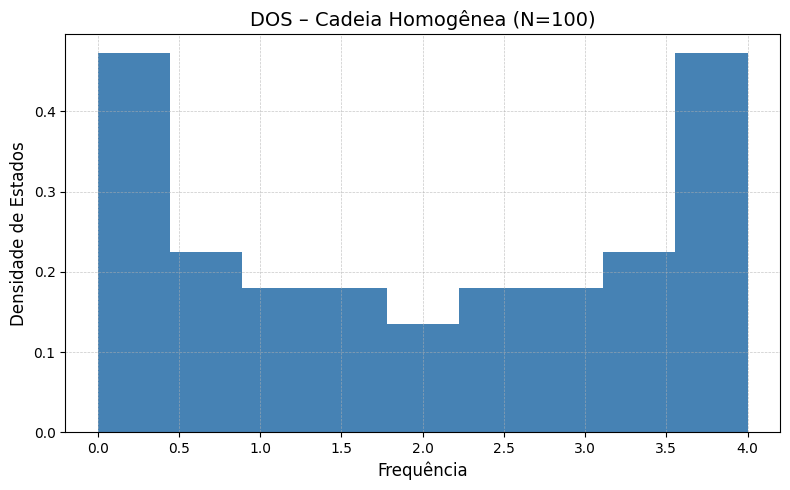

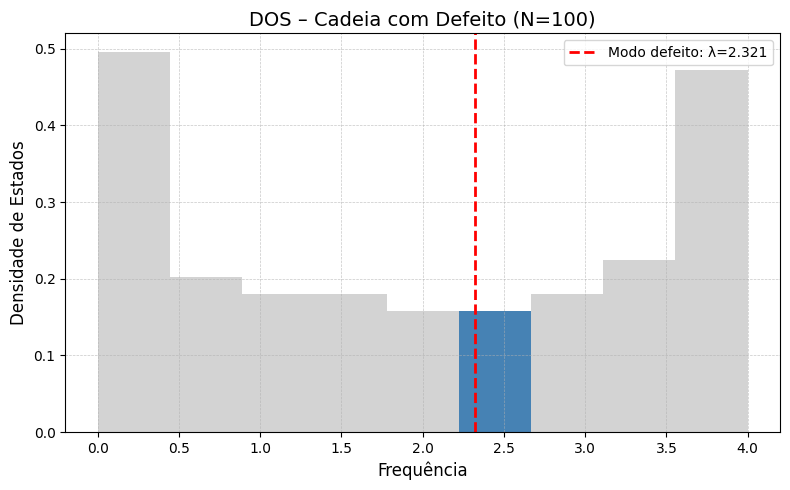

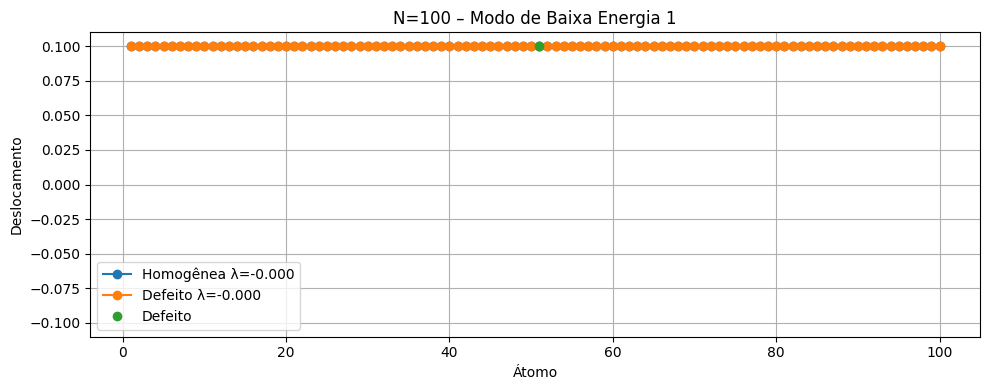

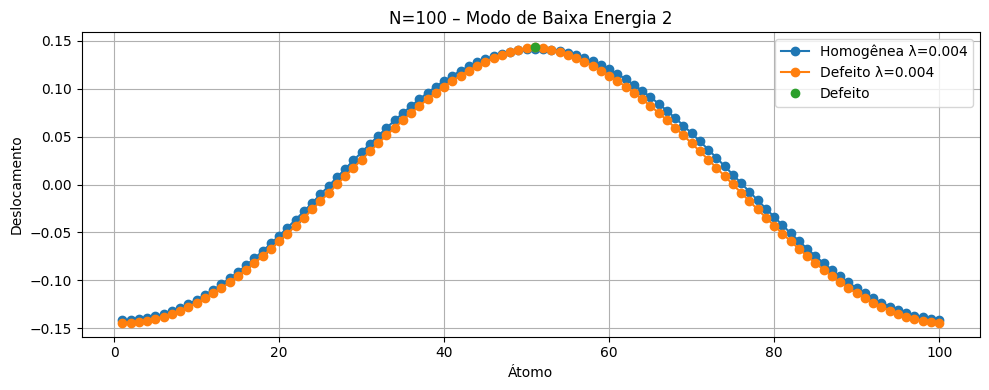

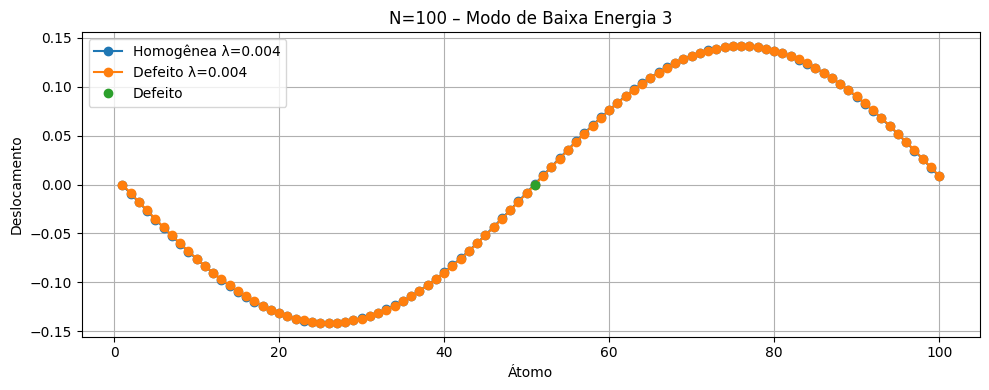

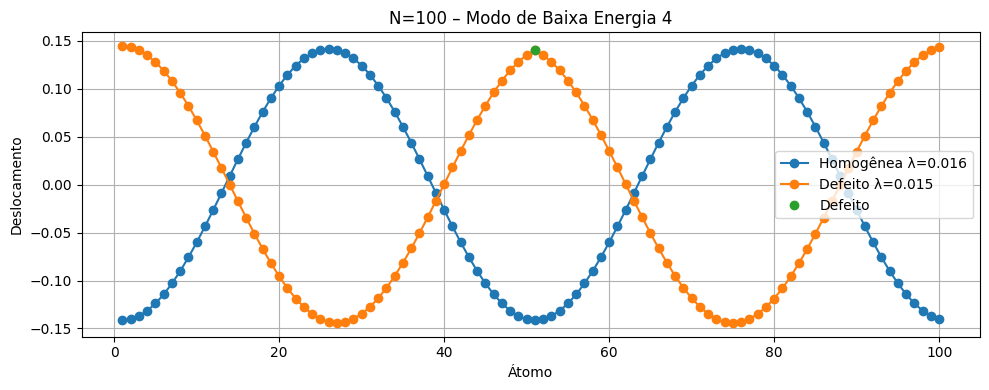

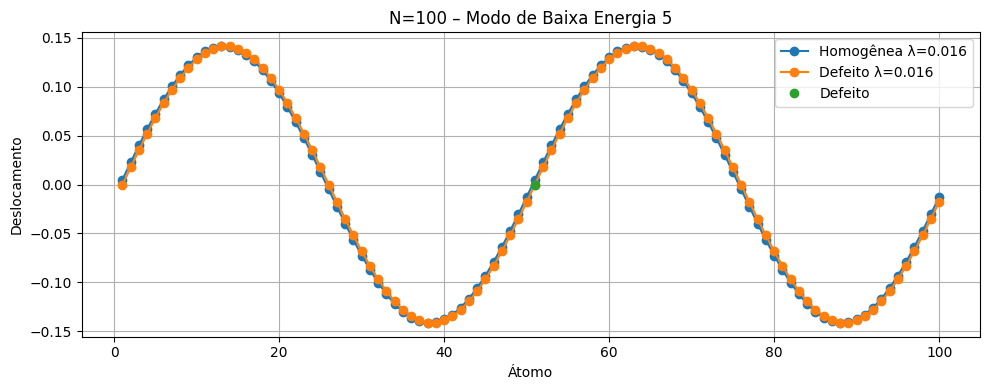

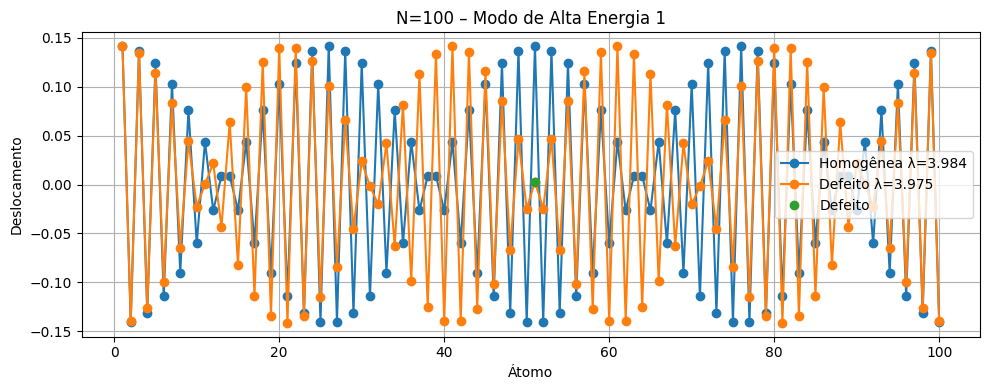

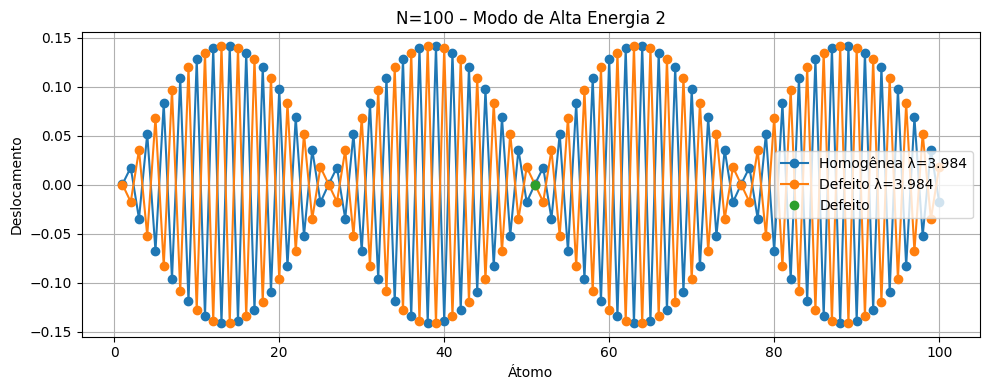

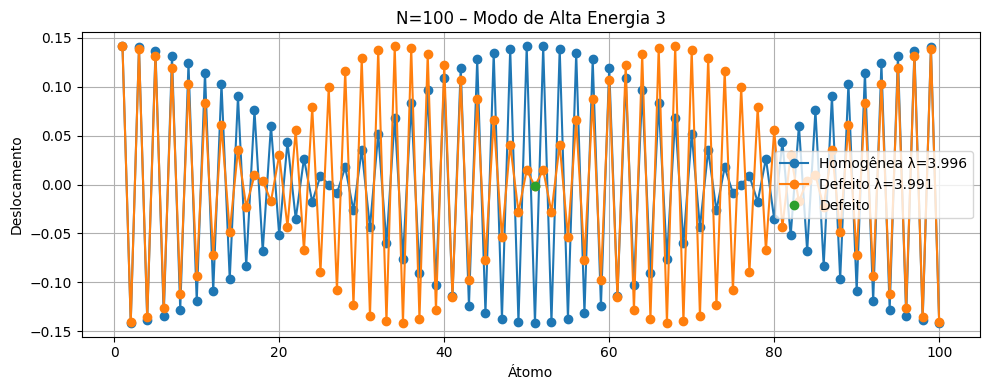

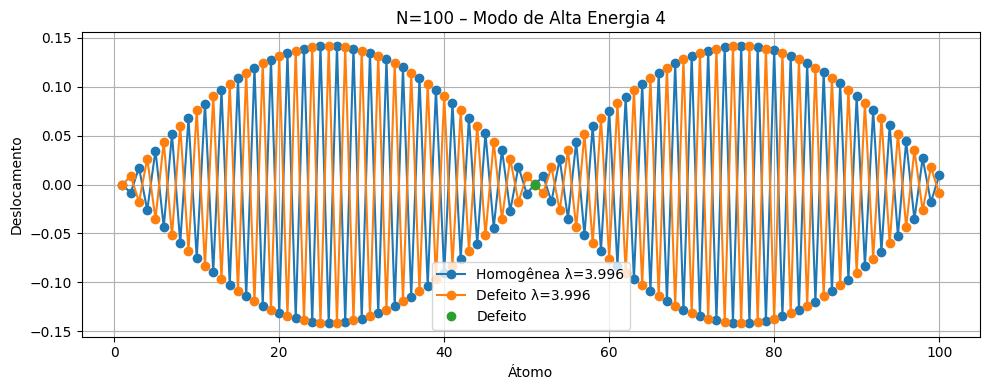

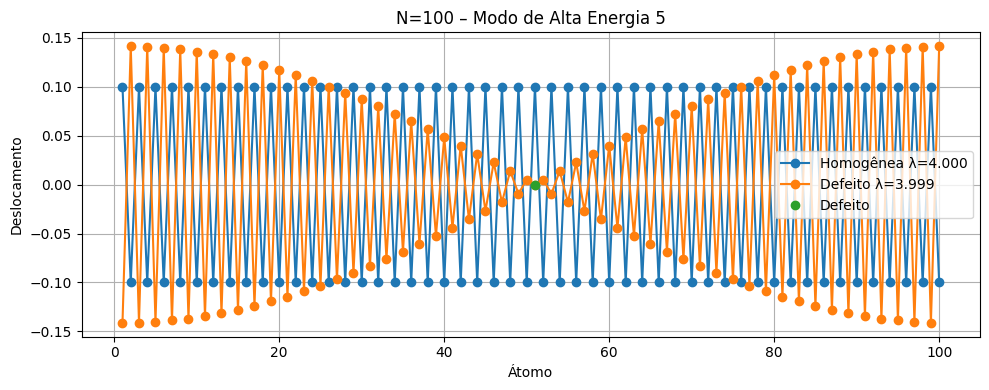

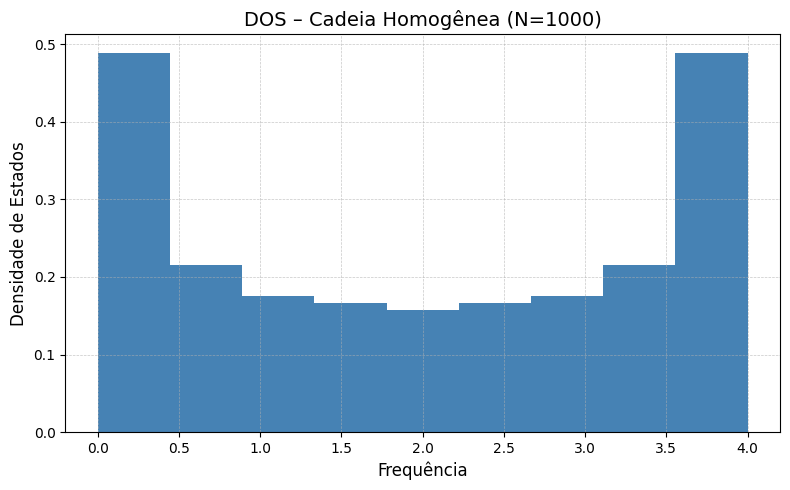

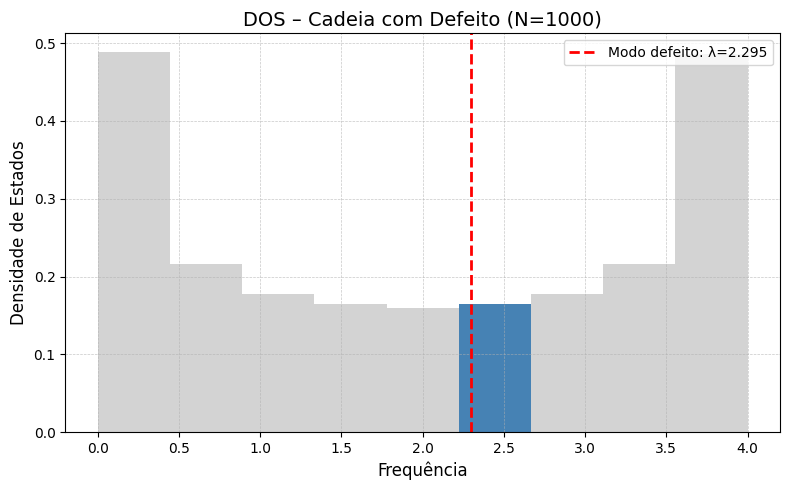

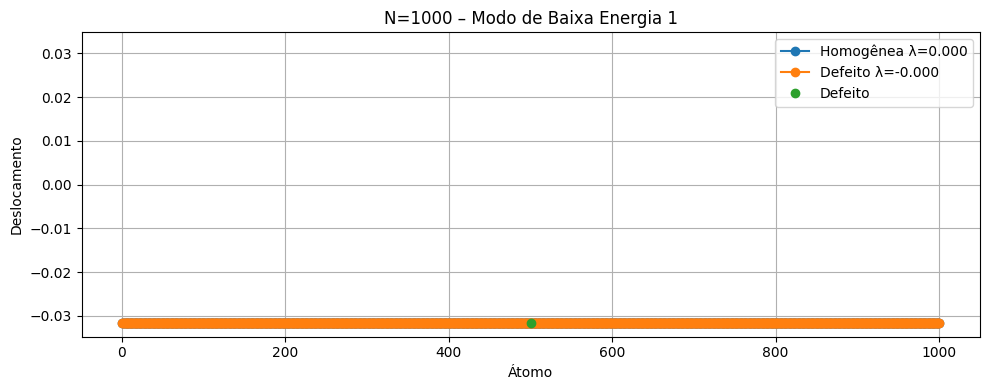

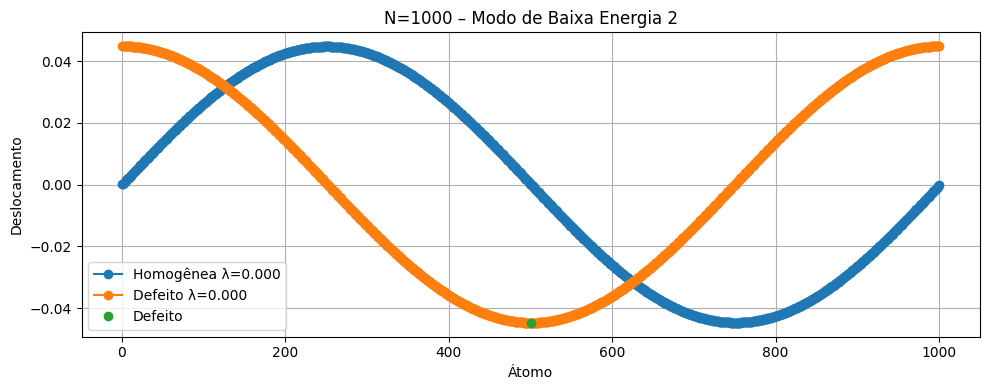

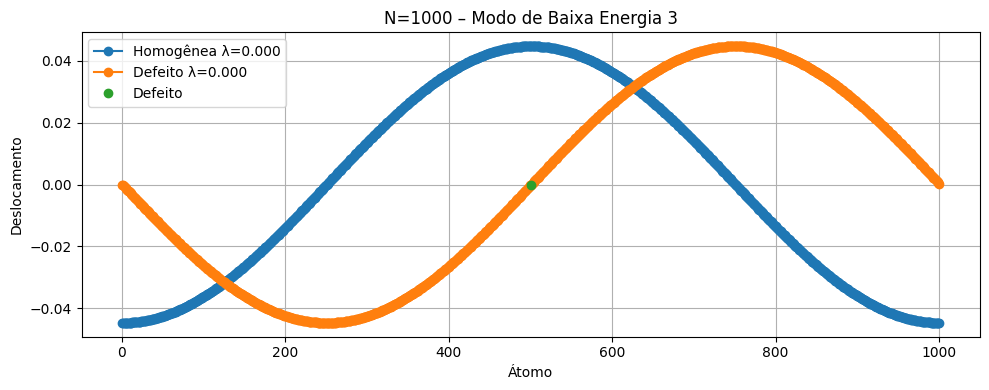

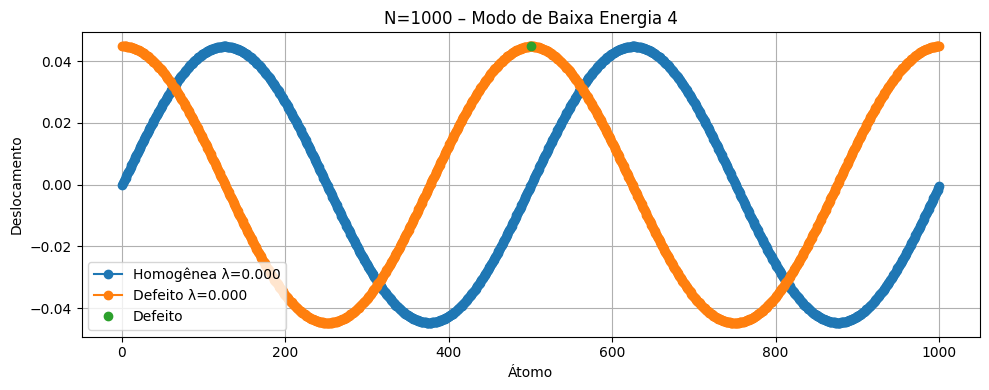

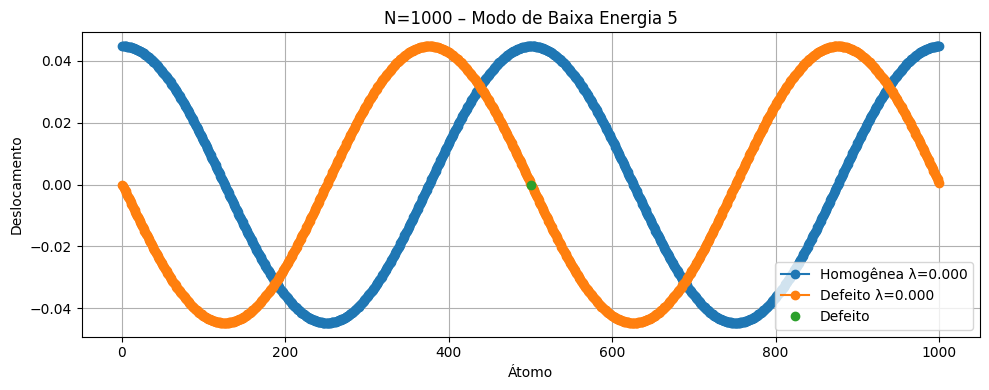

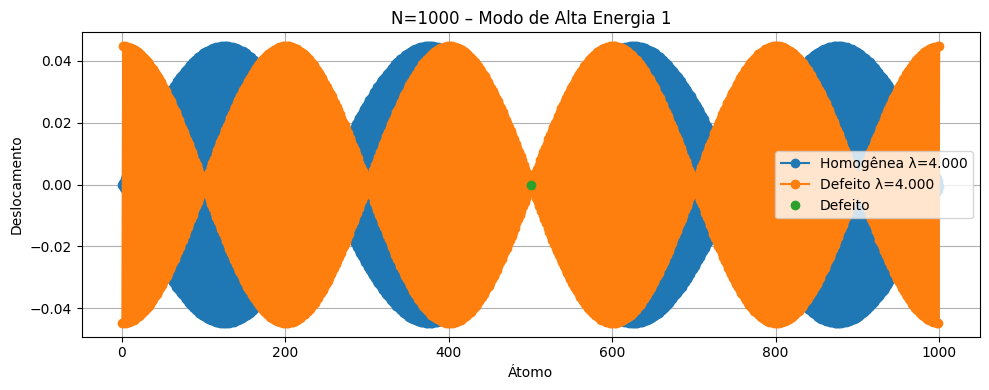

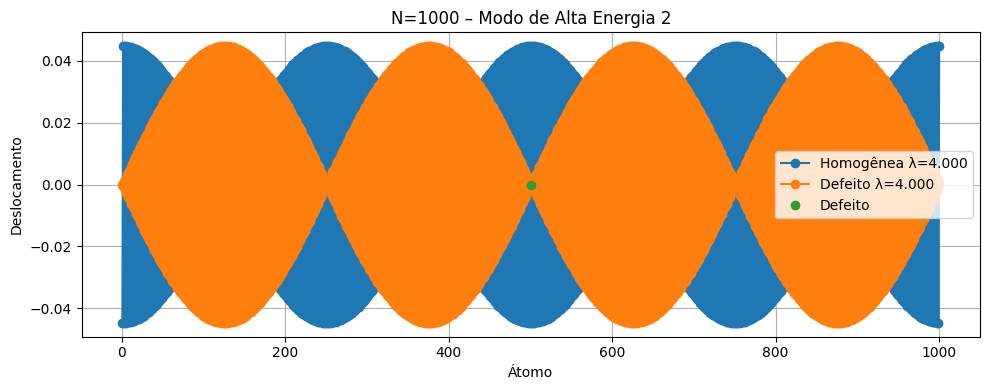

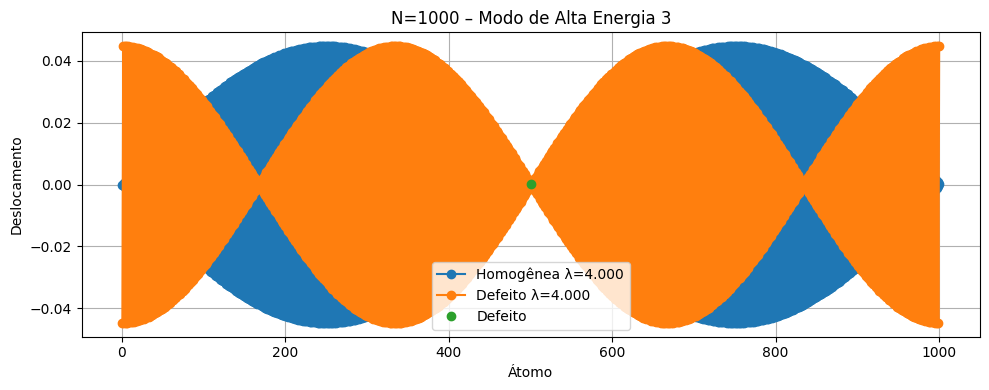

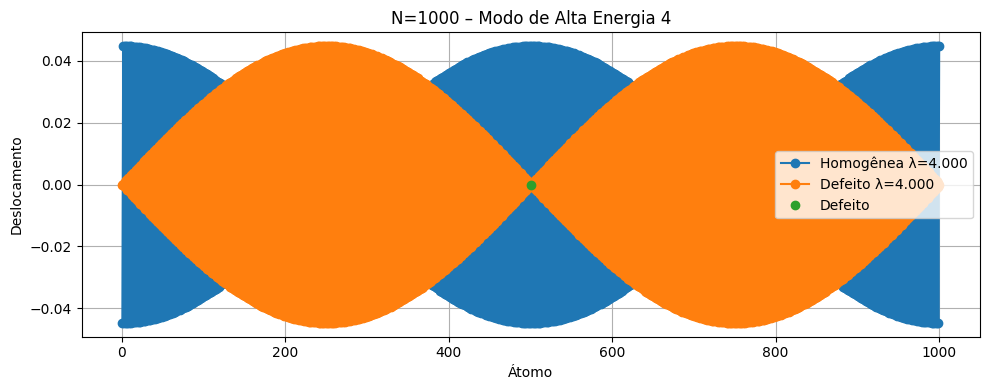

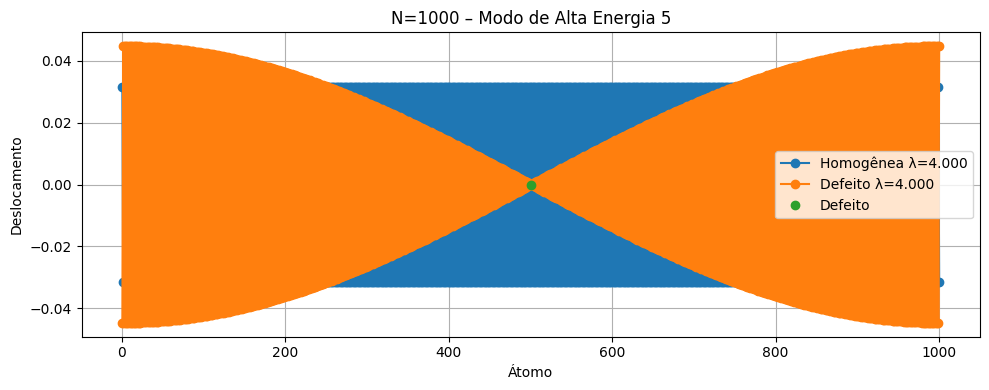

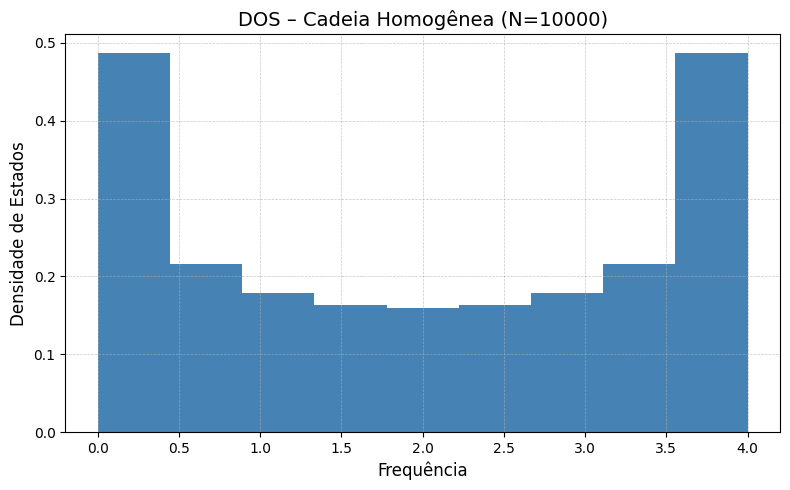

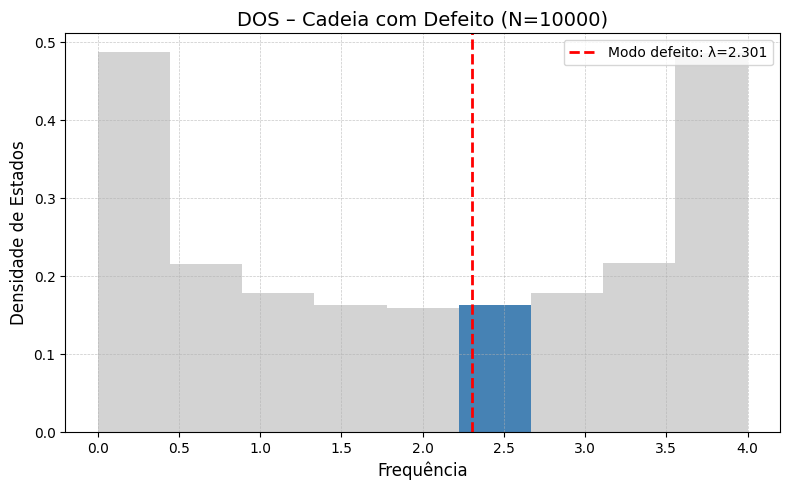

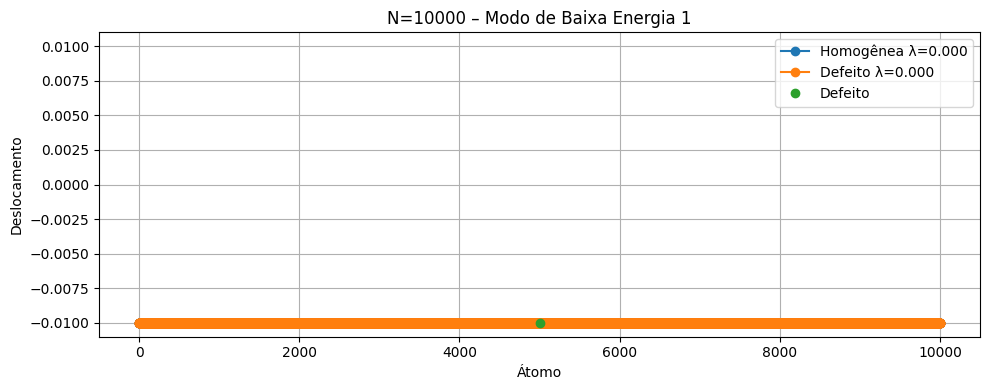

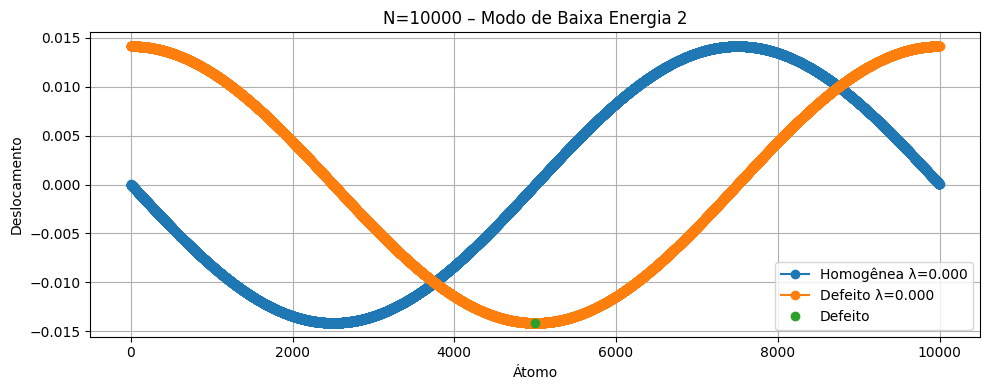

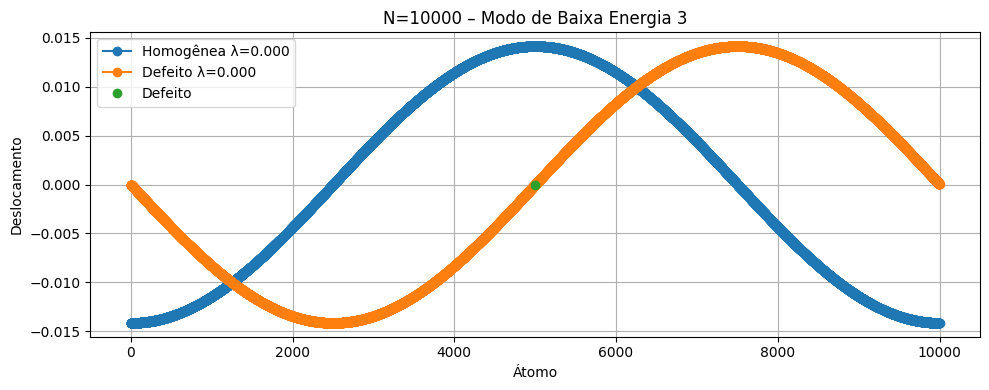

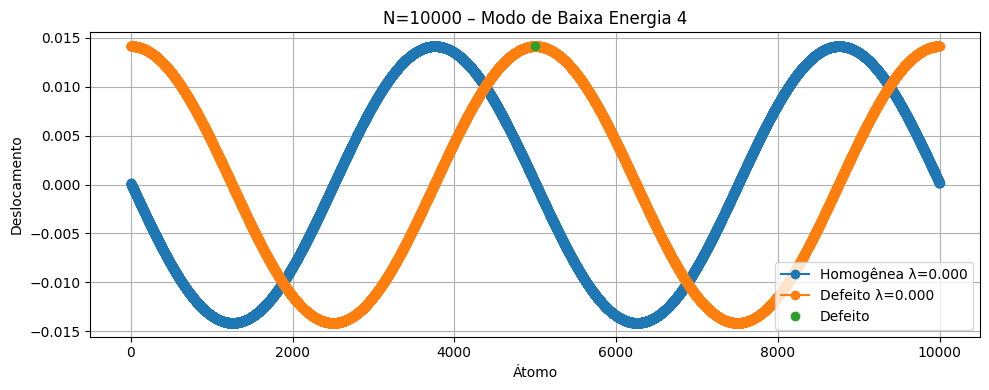

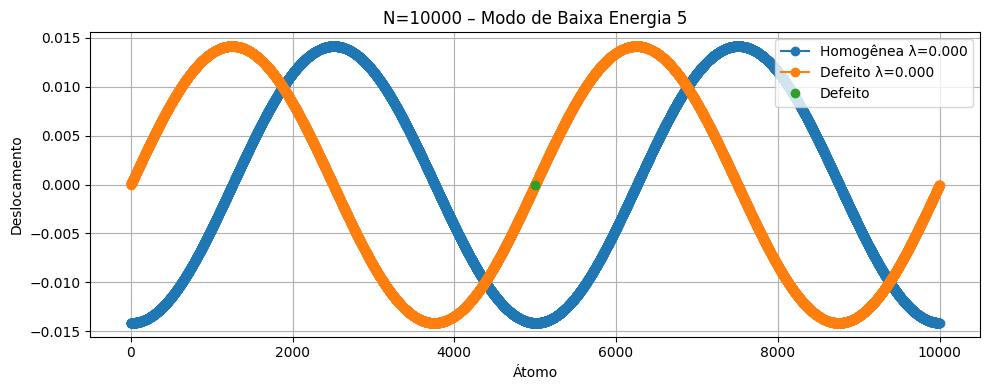

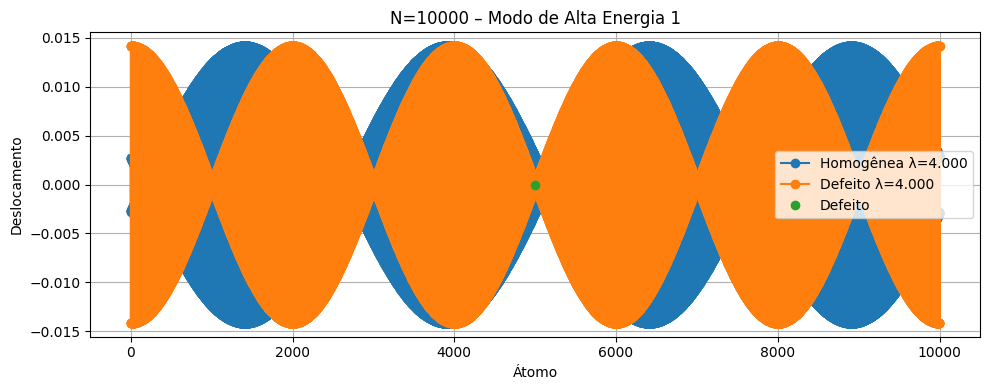

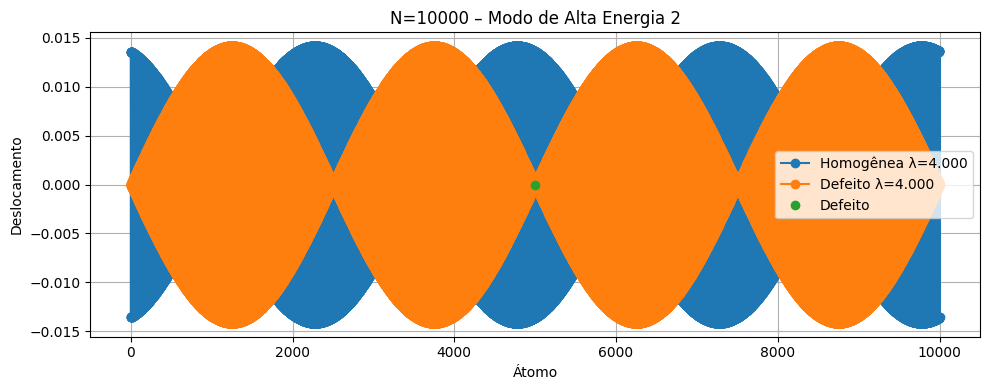

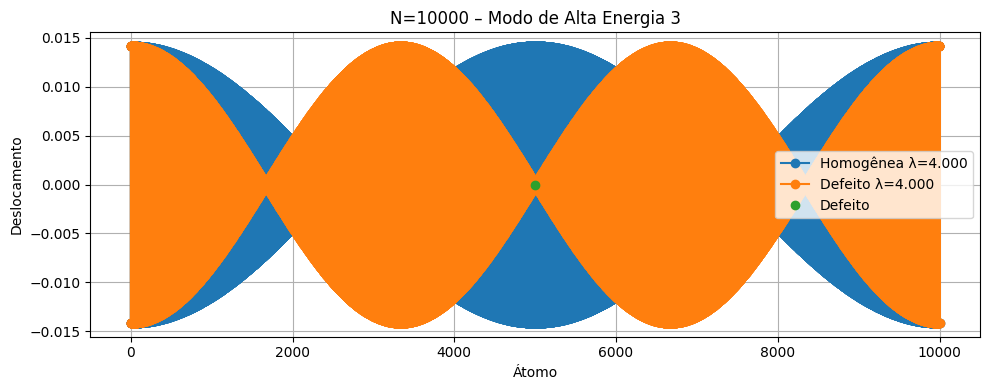

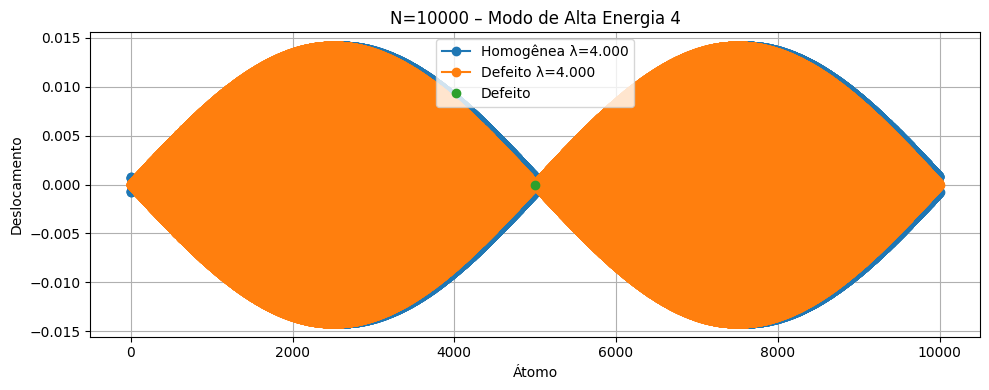

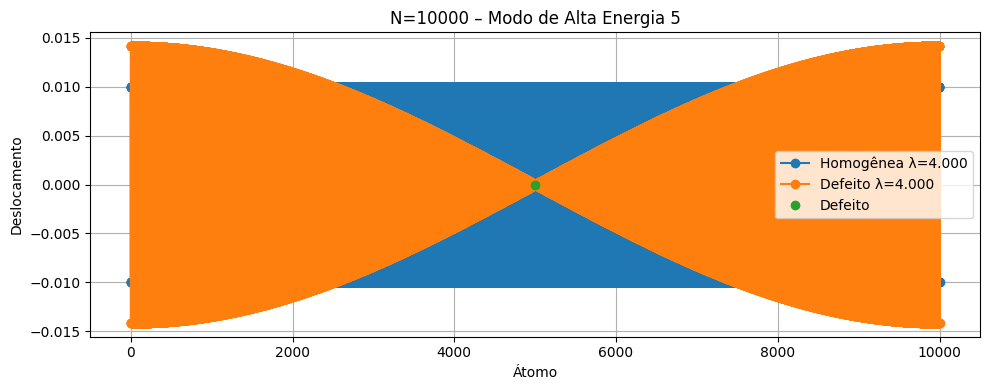

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def montar_matrizes(N, m=1.0, k=1.0, defeito=False, m2=5.0):
    # Cria um vetor de massas: todos os átomos inicialmente têm massa m.
    vet_masas = np.ones(N) * m
    #Se o parâmetro defeito=True, substitui a massa do átomo do meio da cadeia por m2. Esse é o defeito local na cadeia.
    if defeito:
        vet_masas[N // 2] = m2
    #Inicializa a matriz de rigidez K como uma matriz N×N cheia de zeros.
    K = np.zeros((N, N))
    #Coloca 2k na diagonal principal da matriz K, pois cada átomo está ligado a dois vizinhos (exceto no caso de contorno).
    np.fill_diagonal(K, 2 * k)
    #Define os acoplamentos entre vizinhos: -k nas posições acima e abaixo da diagonal → ligações com os vizinhos diretos.
    for i in range(N - 1):
        K[i, i+1] = -k
        K[i+1, i] = -k
    #Condições de contorno periódicas
    #Essas duas linhas fecham a cadeia em um anel, ou seja, o último átomo está ligado ao primeiro. Isso é o que chamamos de condições de contorno periódicas.
    K[0, N-1] = -k
    K[N-1, 0] = -k
    return vet_masas, K

    #Calcular os modos normais de uma cadeia de átomos
def calc_eigens(N, defeito=False, m=1.0, k=1.0, m2=5.0):
    #vet_masas: vetor com a massa de cada átomo
    #K: matriz de rigidez que representa as ligações entre átomos com molas
    vet_masas, K = montar_matrizes(N, m=m, k=k, defeito=defeito, m2=m2)
    #Monta a matriz inversa da massa
    M_inv = np.diag(1.0 / vet_masas)
    #Calcula a matriz dinâmica 
    A = M_inv.dot(K)
    #Calcula os autovalores (vals) e autovetores (vecs) da matriz dinâmica
    vals, vecs = np.linalg.eig(A)
    #Garante que os autovalores sejam reais (descarta partes imaginárias residuais)
    vals = np.real(vals)
    #Ordena os autovalores do menor para o maior
    idx = np.argsort(vals)
    #vals[idx]: os autovalores ordenados (frequências²)
    #vecs[:, idx]: os autovetores correspondentes, também ordenados
    return vals[idx], vecs[:, idx]

def plot_dos(eig_vals, lam_def=None, title='DOS', bins=9):
    hist, bin_edges = np.histogram(eig_vals, bins=bins, density=True)
    bin_w = bin_edges[1] - bin_edges[0]
    if lam_def is None:
        plt.figure(figsize=(8, 5), dpi=100)
        plt.hist(eig_vals, bins=bins, density=True,
                 color='steelblue', linewidth=0.5)
    else:
        colors = [
            'steelblue' if (bin_edges[i] <= lam_def < bin_edges[i+1]) else 'lightgrey'
            for i in range(len(hist))
        ]
        plt.figure(figsize=(8, 5), dpi=100)
        plt.bar(bin_edges[:-1], hist, width=bin_w, align='edge',
                color=colors, linewidth=0.5)
        plt.axvline(lam_def, color='red', linestyle='--', linewidth=2,
                    label=f'Modo defeito: λ={lam_def:.3f}')
        plt.legend(fontsize=10)
    plt.title(title, fontsize=14)
    plt.xlabel('Frequência', fontsize=12)
    plt.ylabel('Densidade de Estados', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_comparacao(N, modos=5):
    eig_hom_vals, eig_hom_vecs = calc_eigens(N, defeito=False)
    eig_def_vals, eig_def_vecs = calc_eigens(N, defeito=True)
    x = np.arange(1, N+1)

    # modos de baixa energia
    for i in range(modos):
        plt.figure(figsize=(10, 4))
        plt.plot(x, eig_hom_vecs[:, i], 'o-',
                 label=f'Homogênea λ={eig_hom_vals[i]:.3f}')
        plt.plot(x, eig_def_vecs[:, i], 'o-',
                 label=f'Defeito λ={eig_def_vals[i]:.3f}')
        plt.plot(x[N//2], eig_def_vecs[N//2, i], 'o', label='Defeito')

        # **escala simétrica** usando o maior valor absoluto + 10% de folga
        y_hom = eig_hom_vecs[:, i]
        y_def = eig_def_vecs[:, i]
        max_amp = max(np.abs(y_hom).max(), np.abs(y_def).max())
        pad = 0.1 * max_amp if max_amp > 0 else 0.1
        plt.ylim(-max_amp - pad, +max_amp + pad)

        plt.title(f'N={N} – Modo de Baixa Energia {i+1}')
        plt.xlabel('Átomo')
        plt.ylabel('Deslocamento')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # modos de alta energia
    for j, i in enumerate(range(-modos, 0), start=1):
        plt.figure(figsize=(10, 4))
        plt.plot(x, eig_hom_vecs[:, i], 'o-',
                 label=f'Homogênea λ={eig_hom_vals[i]:.3f}')
        plt.plot(x, eig_def_vecs[:, i], 'o-',
                 label=f'Defeito λ={eig_def_vals[i]:.3f}')
        plt.plot(x[N//2], eig_def_vecs[N//2, i], 'o', label='Defeito')

        # mesma lógica de escala simétrica
        y_hom = eig_hom_vecs[:, i]
        y_def = eig_def_vecs[:, i]
        max_amp = max(np.abs(y_hom).max(), np.abs(y_def).max())
        pad = 0.1 * max_amp if max_amp > 0 else 0.1
        plt.ylim(-max_amp - pad, +max_amp + pad)

        plt.title(f'N={N} – Modo de Alta Energia {j}')
        plt.xlabel('Átomo')
        plt.ylabel('Deslocamento')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# parâmetros
Ns = [100,1000,10000]     
bins = 9
modes_to_plot = 5

for N in Ns:
    eig_hom_vals, _ = calc_eigens(N, defeito=False)
    eig_def_vals, _ = calc_eigens(N, defeito=True)

    # identifica modo de defeito
    dist = np.min(np.abs(eig_def_vals[:, None] - eig_hom_vals), axis=1)
    idx_def = np.argmax(dist)
    lam_def = eig_def_vals[idx_def]

    # plota DOS
    plot_dos(eig_hom_vals,
             title=f'DOS – Cadeia Homogênea (N={N})',
             bins=bins)
    plot_dos(eig_def_vals, lam_def=lam_def,
             title=f'DOS – Cadeia com Defeito (N={N})',
             bins=bins)

    # plota comparação de modos
    plot_comparacao(N, modos=modes_to_plot)



Versão dos modos normais comparação lado a lado

=== N=100 Homogênea ===
Menores (índice, λ (s^-2), ω (rad/s)):
  modo    0: λ=0.000000e+00  ω=0.000000e+00
  modo    1: λ=3.946543e-03  ω=6.282152e-02
  modo    2: λ=3.946543e-03  ω=6.282152e-02
  modo    3: λ=1.577060e-02  ω=1.255810e-01
  modo    4: λ=1.577060e-02  ω=1.255810e-01
Maiores (índice, λ (s^-2), ω (rad/s)):
  modo   95: λ=3.984229e+00  ω=1.996053e+00
  modo   96: λ=3.984229e+00  ω=1.996053e+00
  modo   97: λ=3.996053e+00  ω=1.999013e+00
  modo   98: λ=3.996053e+00  ω=1.999013e+00
  modo   99: λ=4.000000e+00  ω=2.000000e+00

=== N=100 Defeito ===
Menores (índice, λ (s^-2), ω (rad/s)):
  modo    0: λ=0.000000e+00  ω=0.000000e+00
  modo    1: λ=3.650162e-03  ω=6.041657e-02
  modo    2: λ=3.946543e-03  ω=6.282152e-02
  modo    3: λ=1.460208e-02  ω=1.208391e-01
  modo    4: λ=1.577060e-02  ω=1.255810e-01
Maiores (índice, λ (s^-2), ω (rad/s)):
  modo   95: λ=3.975499e+00  ω=1.993865e+00
  modo   96: λ=3.984229e+00  ω=1.996053e+00
  modo   97: λ=3.991168e+00  ω=1.997791e+00
  mod

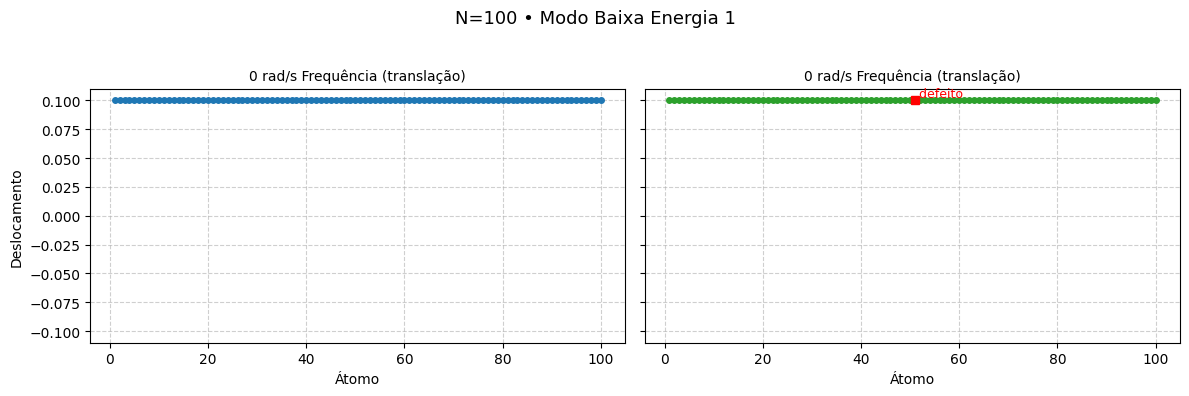

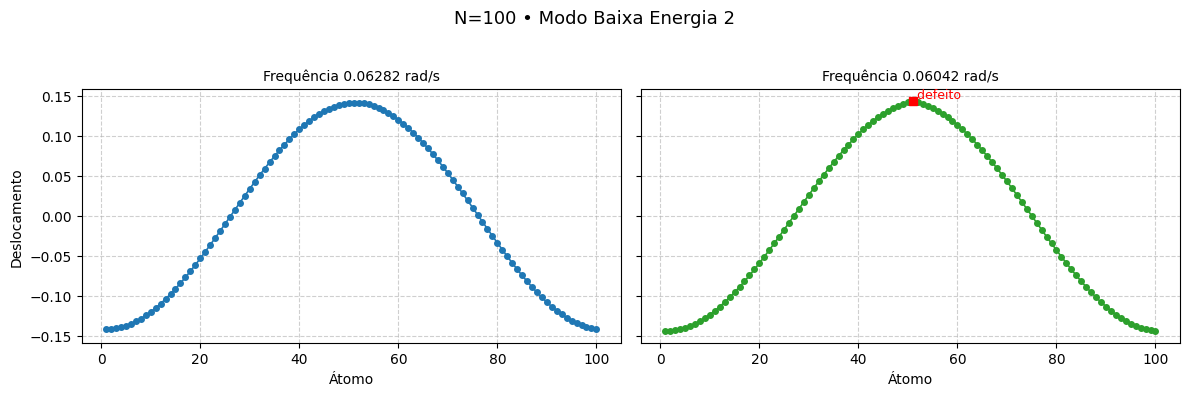

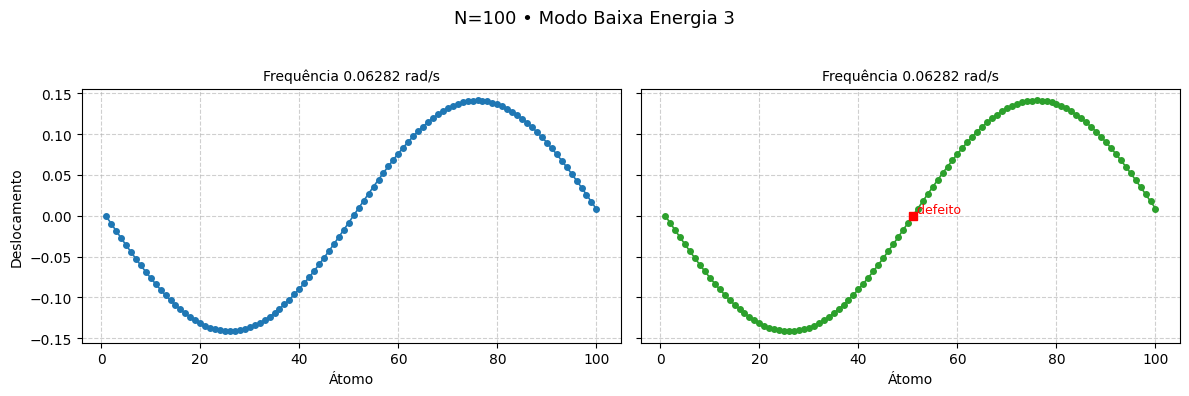

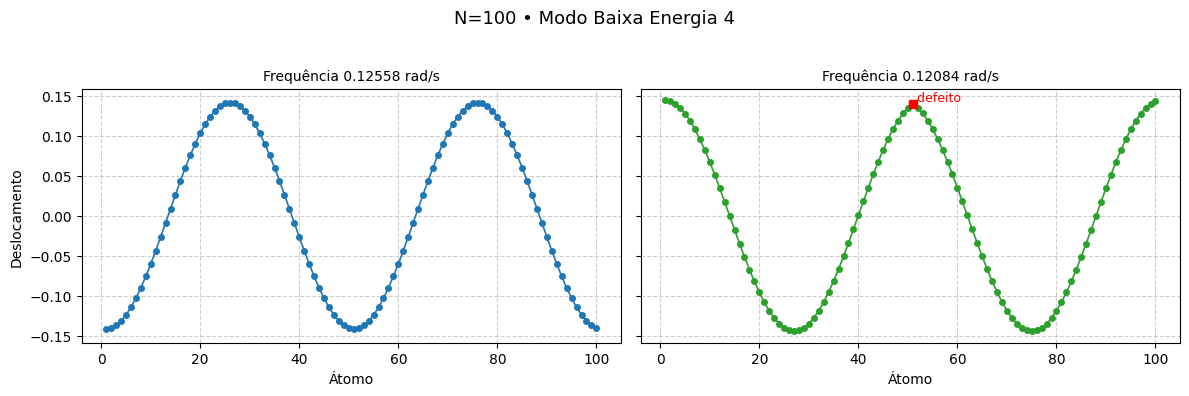

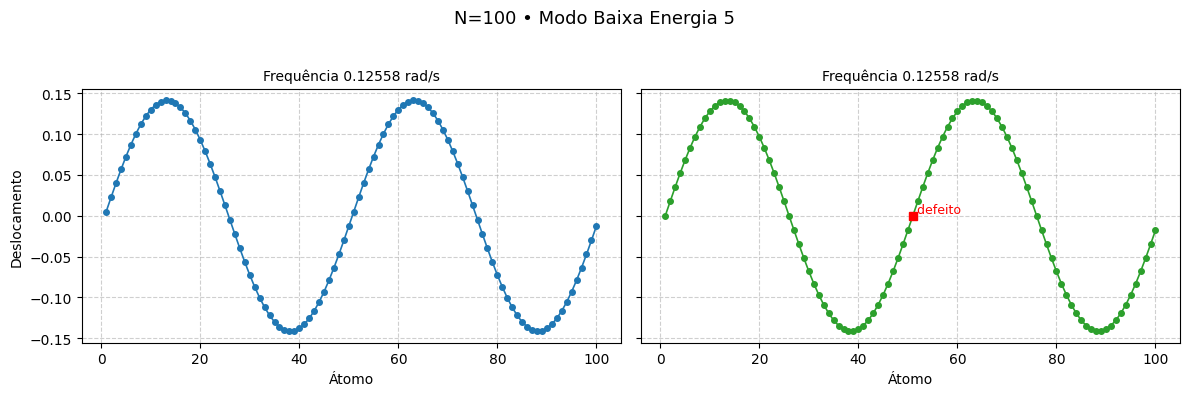

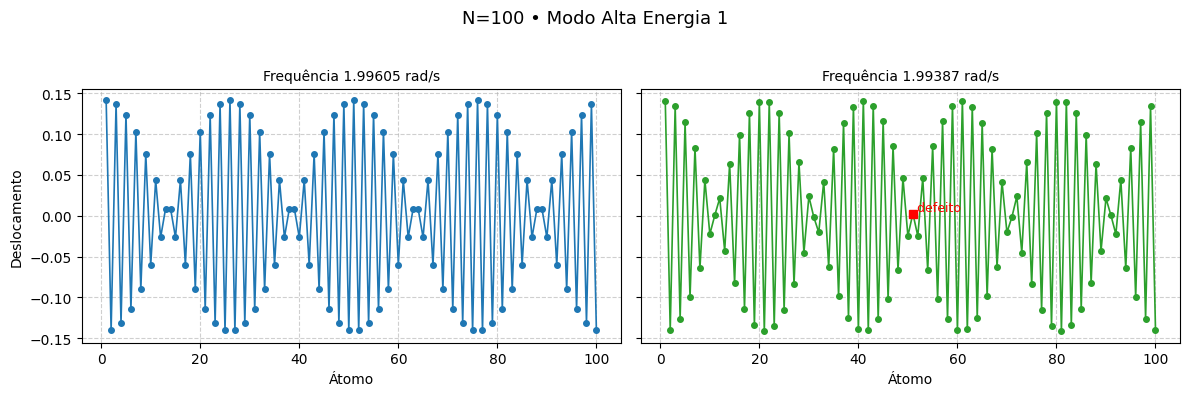

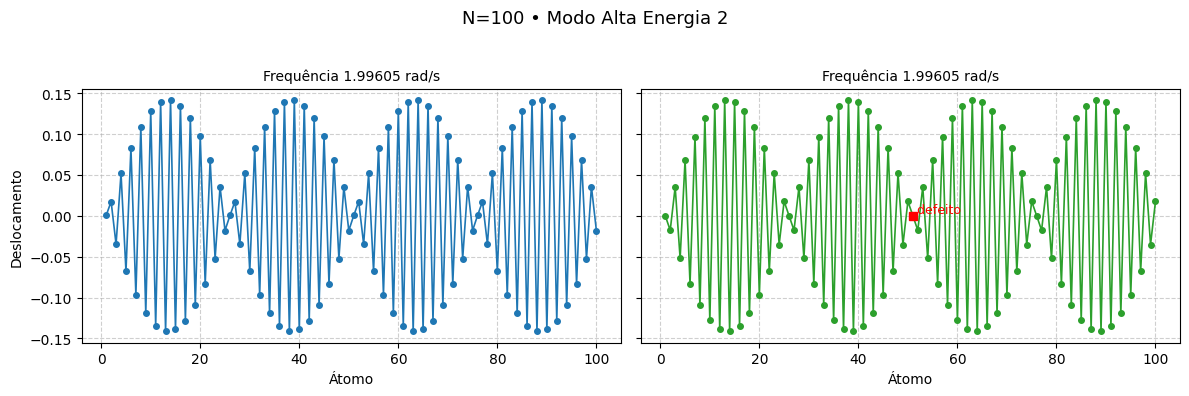

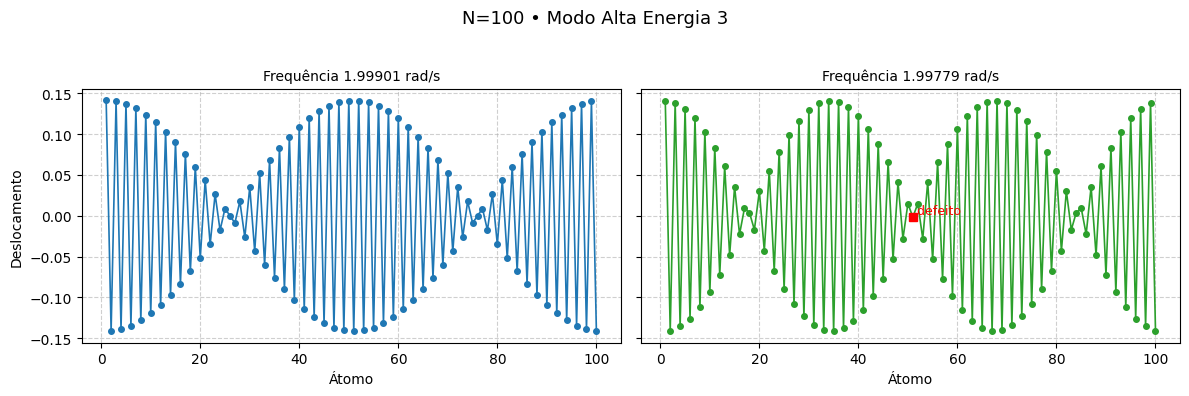

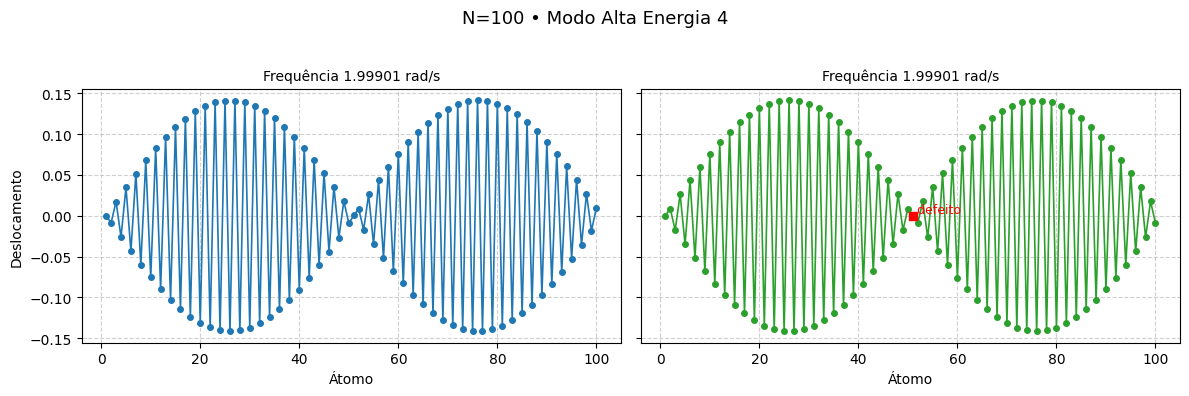

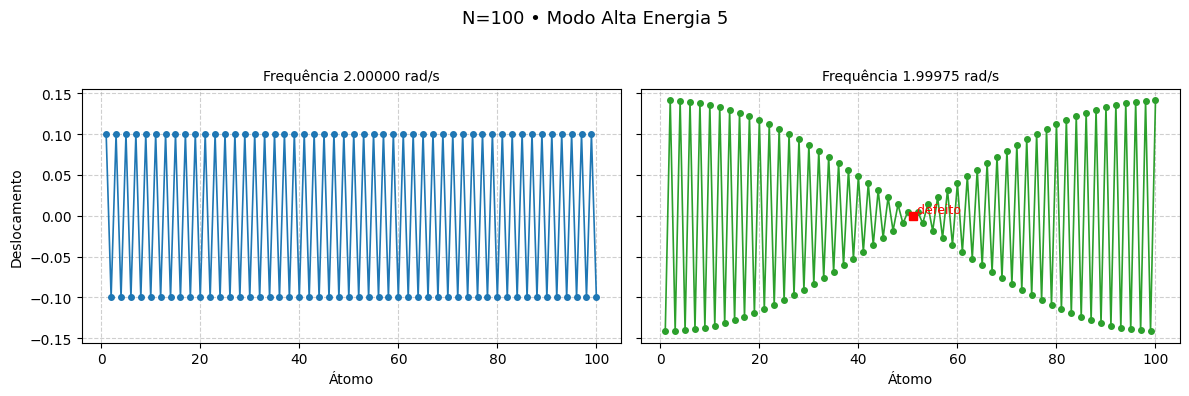

=== N=1000 Homogênea ===
Menores (índice, λ (s^-2), ω (rad/s)):
  modo    0: λ=1.726996e-14  ω=1.314152e-07
  modo    1: λ=3.947829e-05  ω=6.283175e-03
  modo    2: λ=3.947829e-05  ω=6.283175e-03
  modo    3: λ=1.579116e-04  ω=1.256629e-02
  modo    4: λ=1.579116e-04  ω=1.256629e-02
Maiores (índice, λ (s^-2), ω (rad/s)):
  modo  995: λ=3.999842e+00  ω=1.999961e+00
  modo  996: λ=3.999842e+00  ω=1.999961e+00
  modo  997: λ=3.999961e+00  ω=1.999990e+00
  modo  998: λ=3.999961e+00  ω=1.999990e+00
  modo  999: λ=4.000000e+00  ω=2.000000e+00

=== N=1000 Defeito ===
Menores (índice, λ (s^-2), ω (rad/s)):
  modo    0: λ=0.000000e+00  ω=0.000000e+00
  modo    1: λ=3.916436e-05  ω=6.258144e-03
  modo    2: λ=3.947829e-05  ω=6.283175e-03
  modo    3: λ=1.566561e-04  ω=1.251623e-02
  modo    4: λ=1.579116e-04  ω=1.256629e-02
Maiores (índice, λ (s^-2), ω (rad/s)):
  modo  995: λ=3.999753e+00  ω=1.999938e+00
  modo  996: λ=3.999842e+00  ω=1.999961e+00
  modo  997: λ=3.999911e+00  ω=1.999978e+00
  m

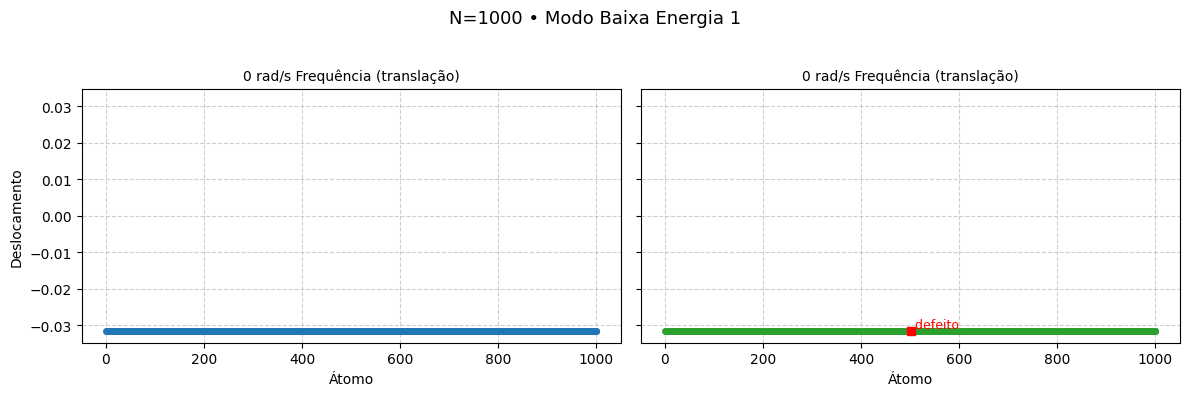

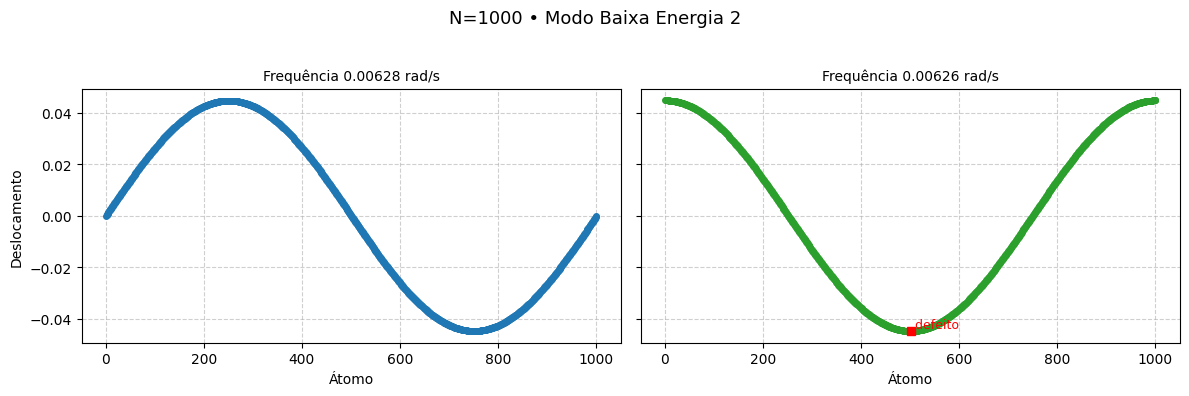

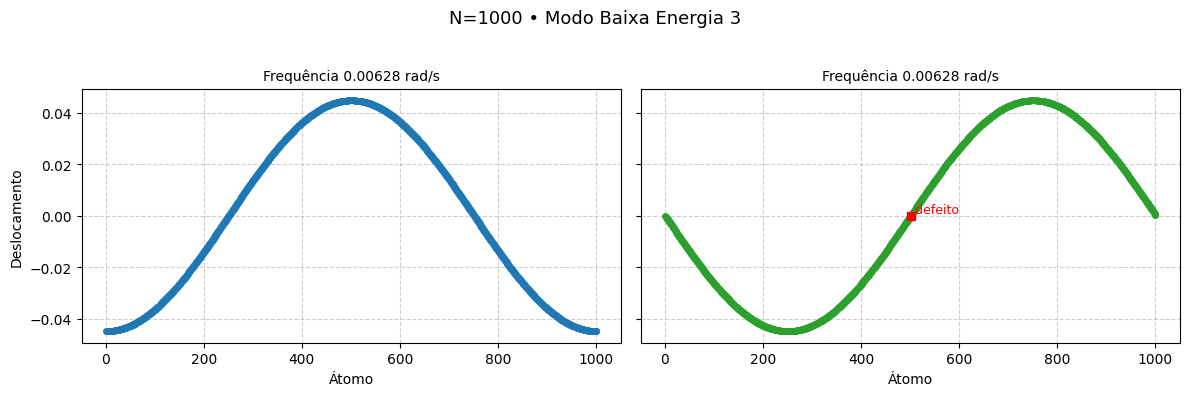

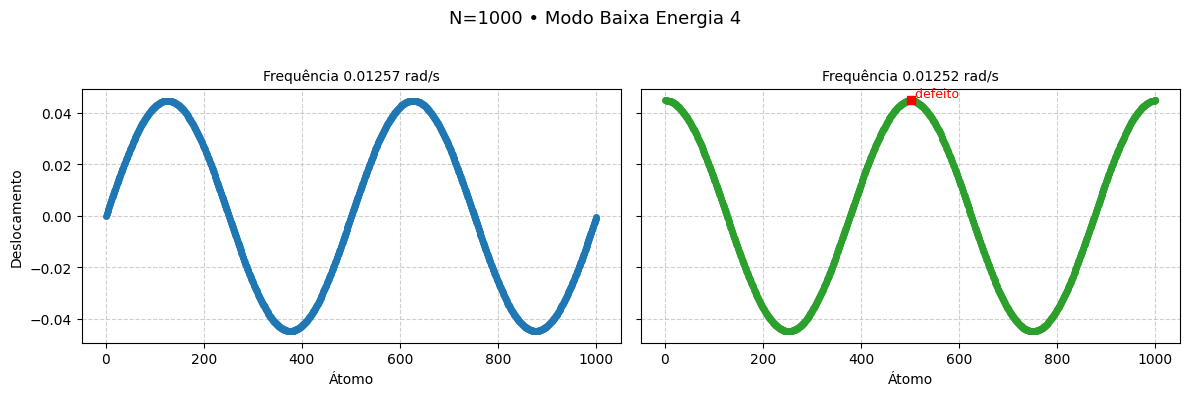

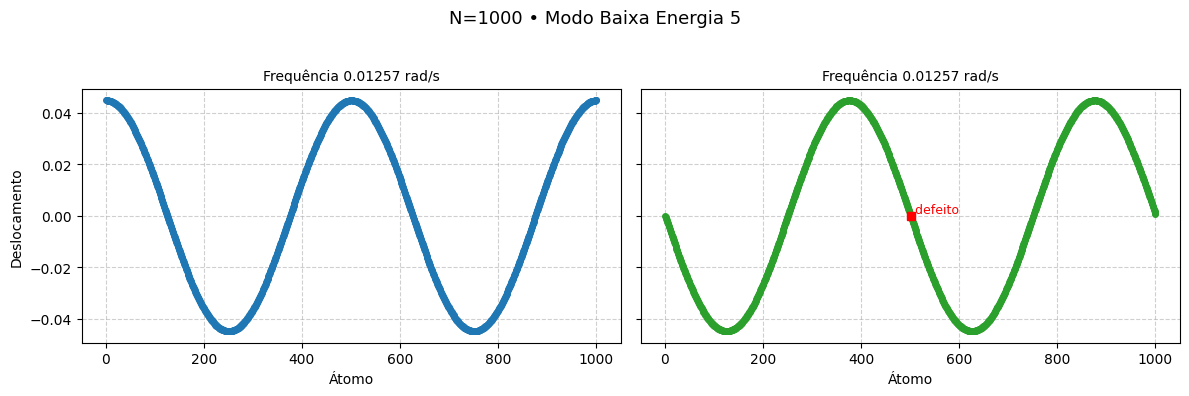

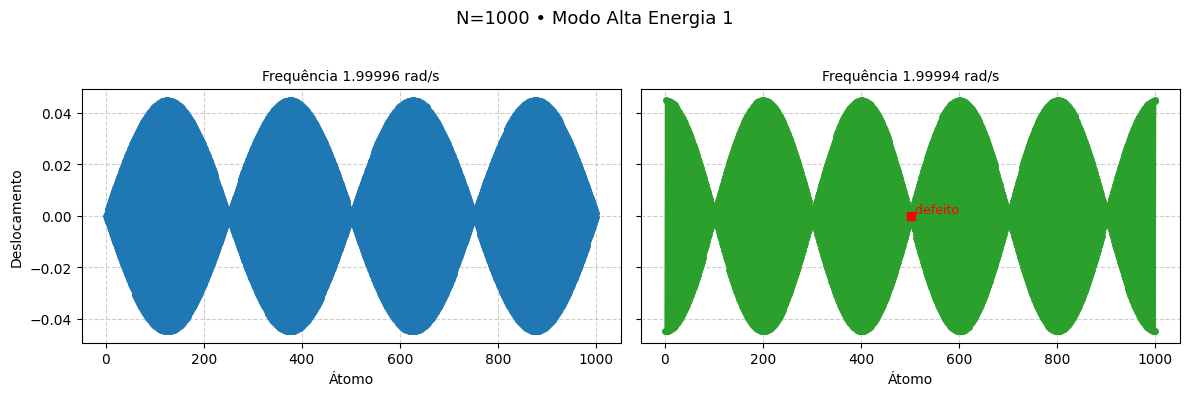

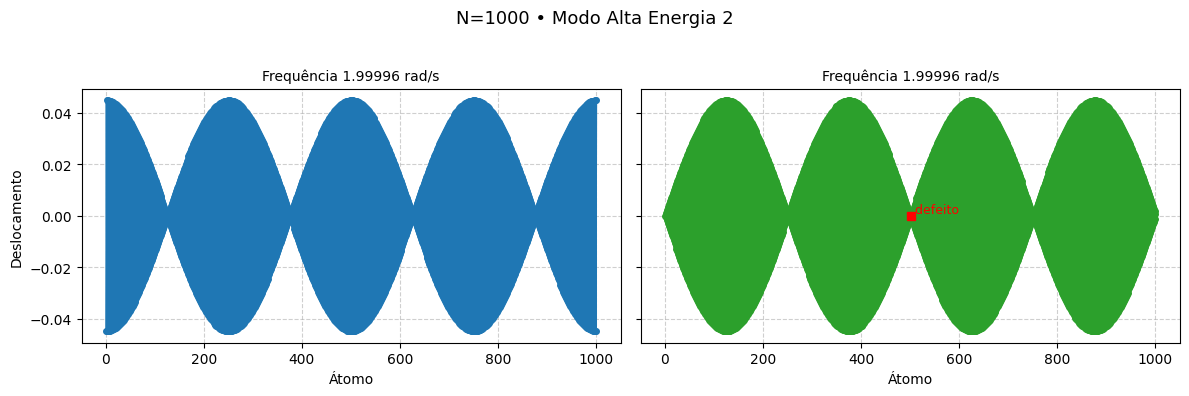

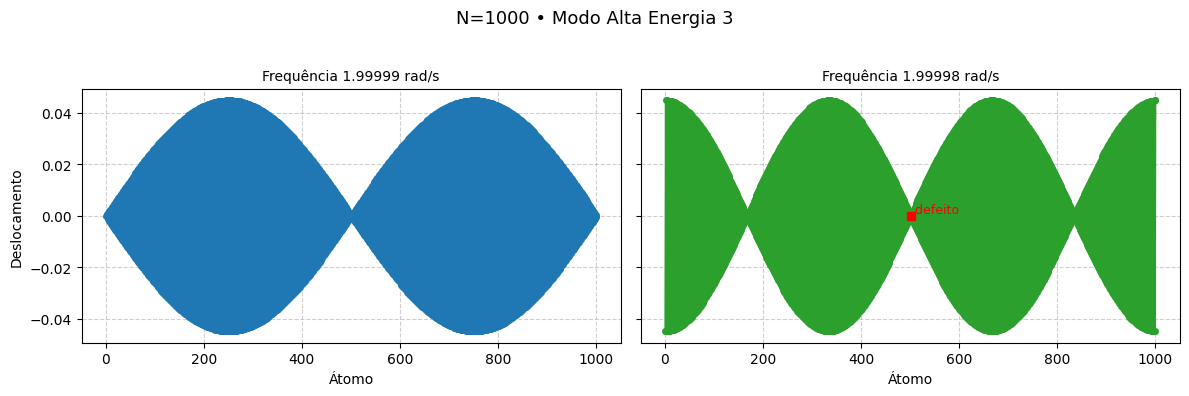

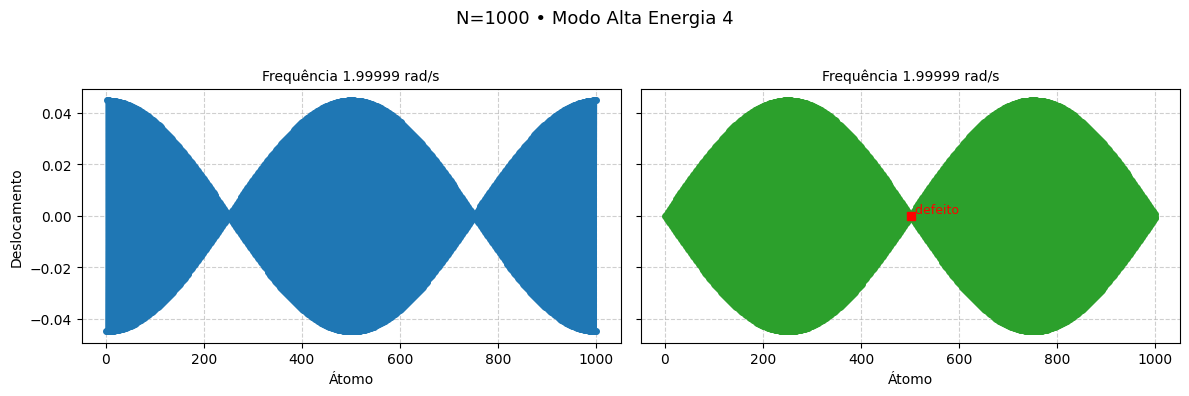

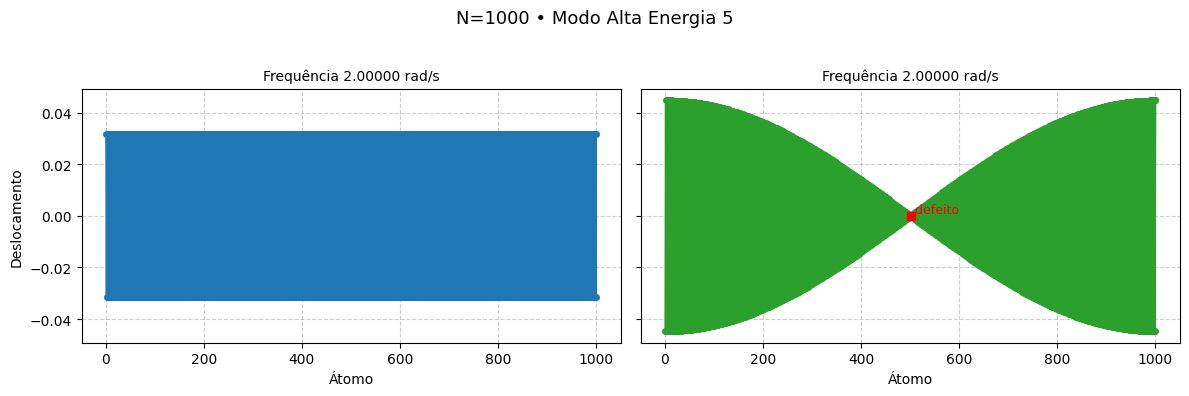

=== N=10000 Homogênea ===
Menores (índice, λ (s^-2), ω (rad/s)):
  modo    0: λ=0.000000e+00  ω=0.000000e+00
  modo    1: λ=3.947842e-07  ω=6.283185e-04
  modo    2: λ=3.947842e-07  ω=6.283185e-04
  modo    3: λ=1.579136e-06  ω=1.256637e-03
  modo    4: λ=1.579136e-06  ω=1.256637e-03
Maiores (índice, λ (s^-2), ω (rad/s)):
  modo 9995: λ=3.999998e+00  ω=2.000000e+00
  modo 9996: λ=3.999998e+00  ω=2.000000e+00
  modo 9997: λ=4.000000e+00  ω=2.000000e+00
  modo 9998: λ=4.000000e+00  ω=2.000000e+00
  modo 9999: λ=4.000000e+00  ω=2.000000e+00

=== N=10000 Defeito ===
Menores (índice, λ (s^-2), ω (rad/s)):
  modo    0: λ=1.755407e-15  ω=4.189757e-08
  modo    1: λ=3.944685e-07  ω=6.280673e-04
  modo    2: λ=3.947842e-07  ω=6.283185e-04
  modo    3: λ=1.577874e-06  ω=1.256135e-03
  modo    4: λ=1.579136e-06  ω=1.256637e-03
Maiores (índice, λ (s^-2), ω (rad/s)):
  modo 9995: λ=3.999998e+00  ω=1.999999e+00
  modo 9996: λ=3.999998e+00  ω=2.000000e+00
  modo 9997: λ=3.999999e+00  ω=2.000000e+00
 

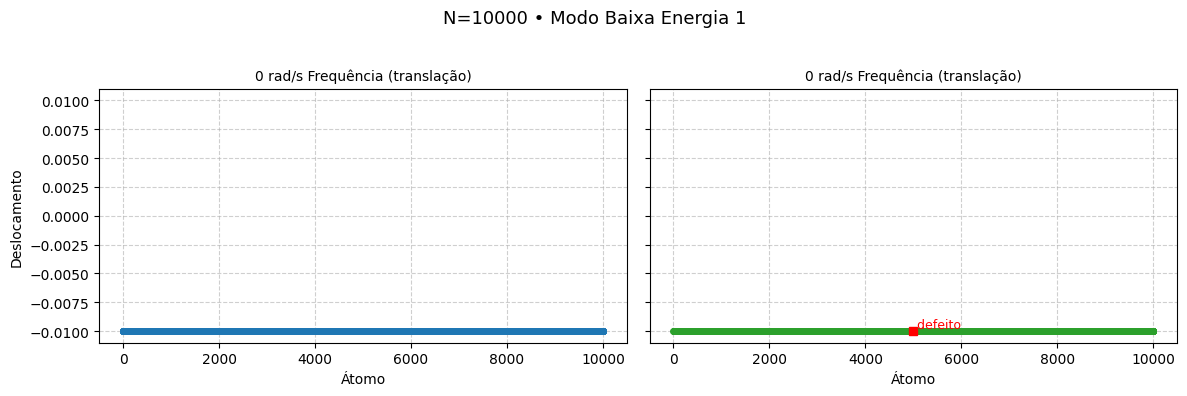

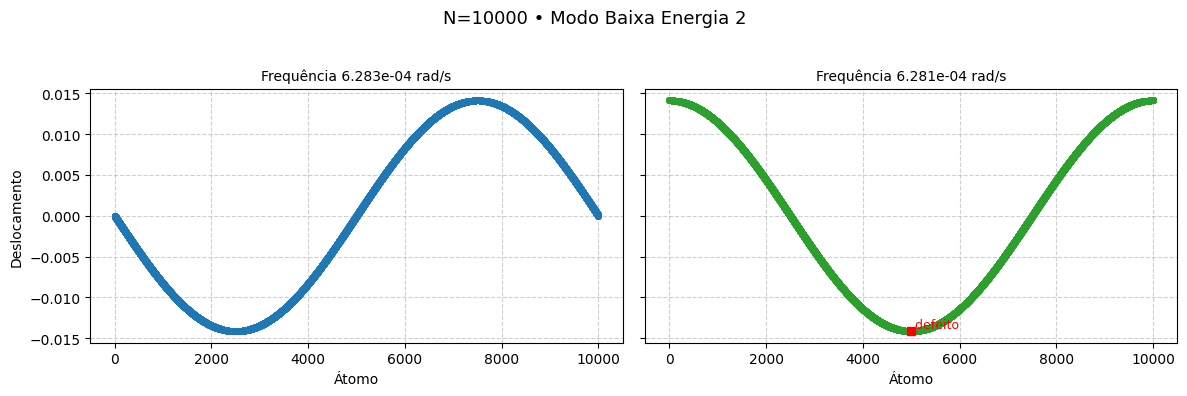

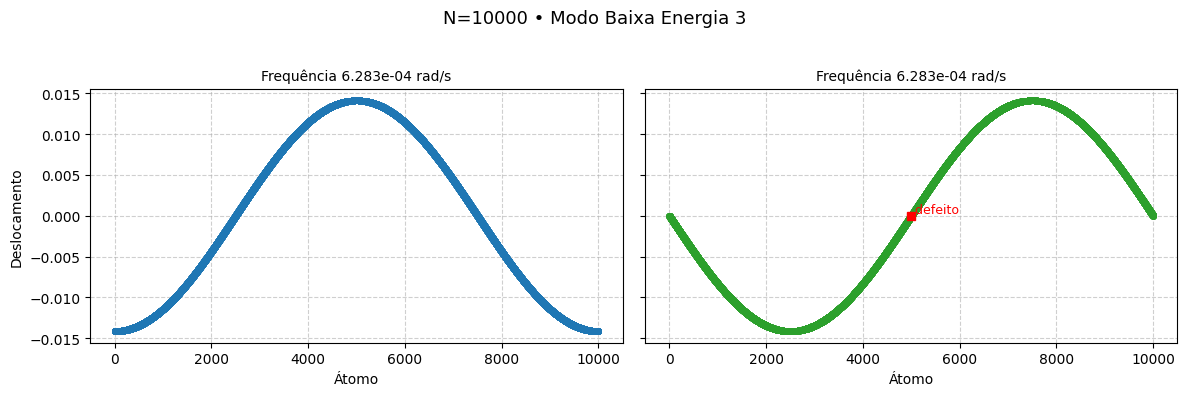

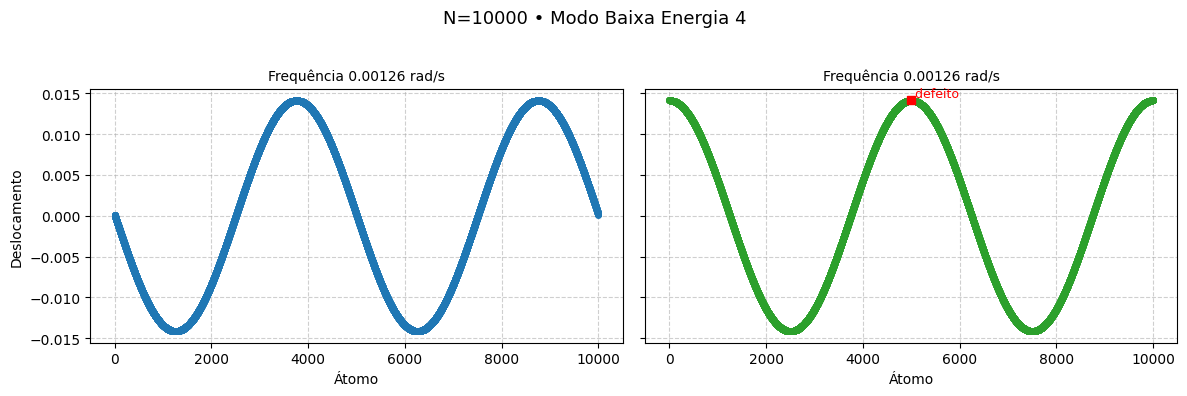

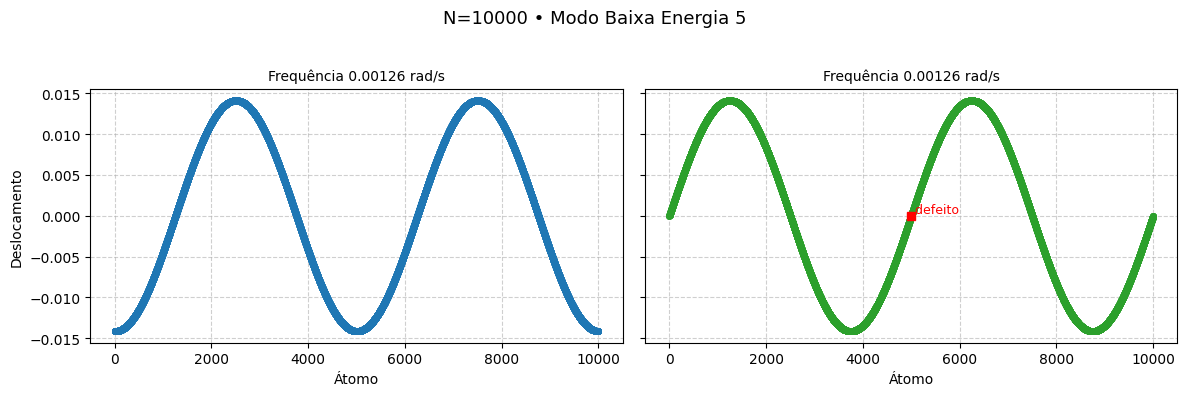

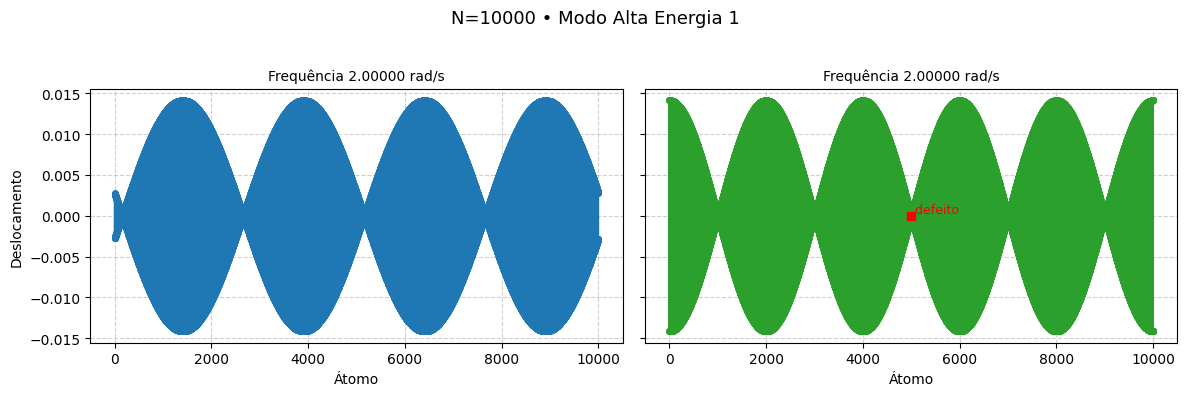

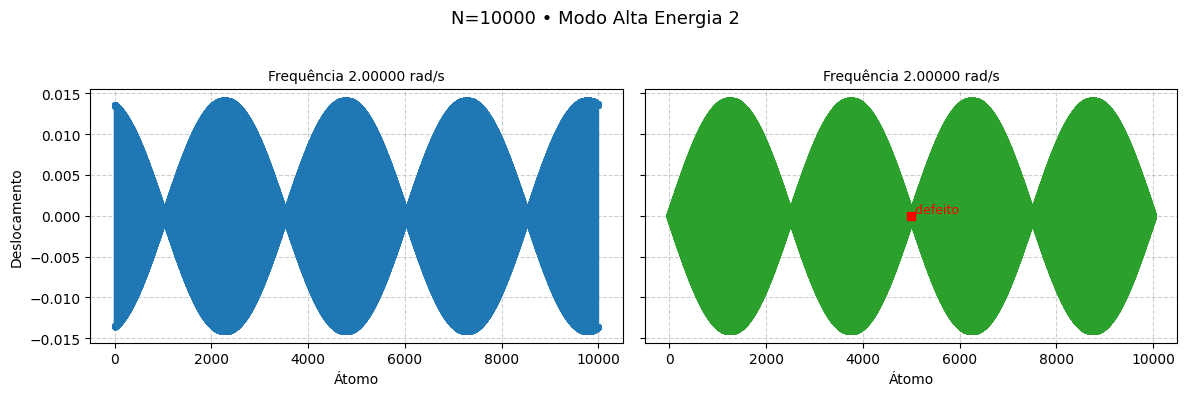

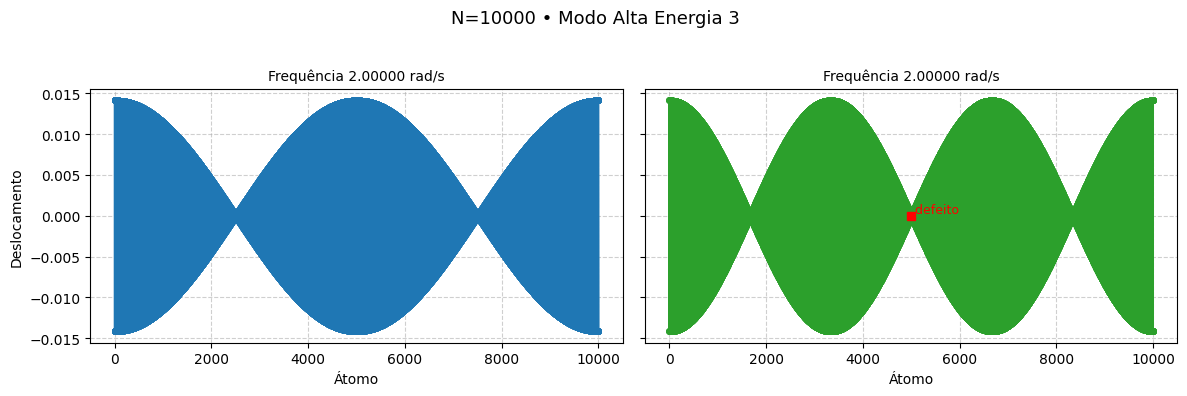

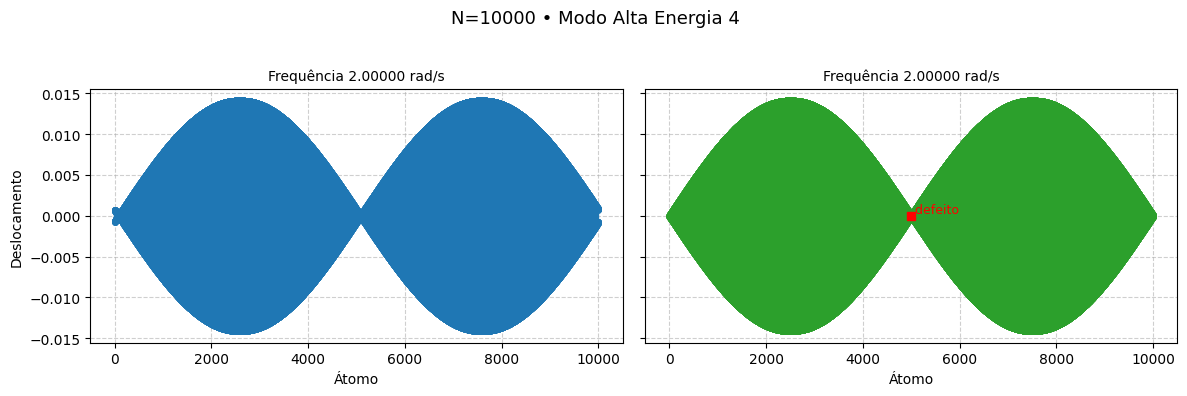

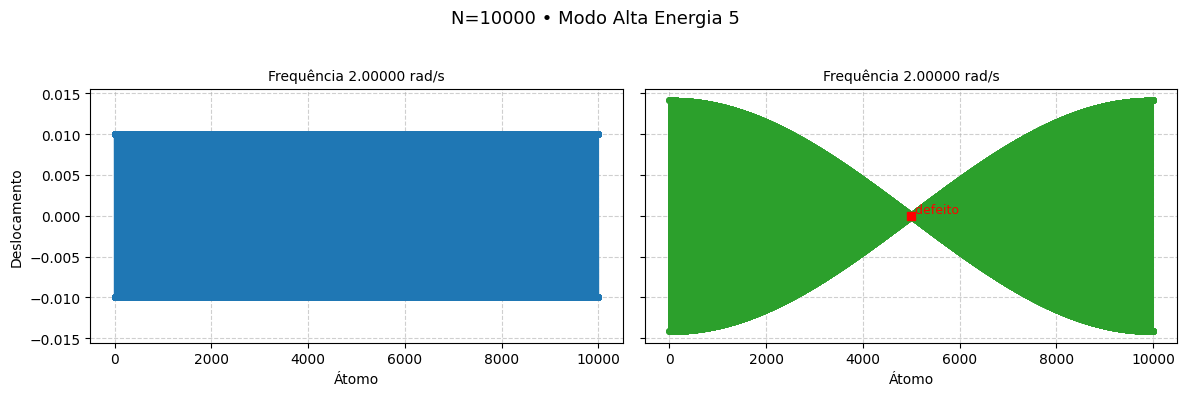

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# =========================================================
# Construção das matrizes
# =========================================================
def montar_matrizes(N, m=1.0, k=1.0, defeito=False, m2=5.0, pos_def=None):
    """
    Cria vetor de massas e matriz K (cadeia 1D com contorno periódico).
    """
    if pos_def is None:
        pos_def = N // 2
    vet_masas = np.full(N, m, dtype=float)
    if defeito:
        vet_masas[pos_def] = m2

    K = np.zeros((N, N), dtype=float)
    np.fill_diagonal(K, 2.0 * k)
    idx = np.arange(N - 1)
    K[idx, idx + 1] = -k
    K[idx + 1, idx] = -k
    K[0, -1] = K[-1, 0] = -k  # contorno periódico
    return vet_masas, K

# =========================================================
# Autovalores / Autovetores
# =========================================================
def calc_eigens(N, defeito=False, m=1.0, k=1.0, m2=5.0, pos_def=None):
    """
    Resolve A v = λ v, com A = M^{-1} K. Retorna (autovalores ordenados, autovetores).
    """
    vet_masas, K = montar_matrizes(N, m=m, k=k, defeito=defeito, m2=m2, pos_def=pos_def)
    M_inv = np.diag(1.0 / vet_masas)
    A = M_inv @ K
    vals, vecs = np.linalg.eig(A)          # A não é necessariamente simétrica
    vals = np.real(vals)
    idx = np.argsort(vals)
    return vals[idx], vecs[:, idx]

# =========================================================
# Formatação λ / ω com unidades
# =========================================================
def _format_val(lam, modo_trans=False, exibir='ambos', tol=1e-12,
                unidades_lambda='s^{-2}'):
    """
    Formata string para título de subplot.
    lam            : autovalor bruto
    modo_trans     : True se é o modo de translação (primeiro modo homogêneo)
    exibir         : 'lambda' | 'omega' | 'ambos'
    tol            : threshold para considerar λ = 0
    unidades_lambda: unidade exibida para λ
    """
    lam = 0.0 if abs(lam) < tol else lam
    if exibir not in ('ambos', 'lambda', 'omega'):
        exibir = 'ambos'

    def fmt_l(val):
        if val == 0.0:
            return "0"
        return f"λ={val:.5f}" if 1e-3 <= abs(val) < 1e3 else f"λ={val:.3e}"

    def fmt_w(val):
        if val <= 0.0:
            return "0"
        w = np.sqrt(val)
        return f"{w:.5f}" if 1e-3 <= w < 1e3 else f"{w:.3e}"

    parts = []

    # λ
    if exibir in ('lambda', 'ambos'):
        txt = fmt_l(lam) + f" {unidades_lambda}"
        if lam == 0.0 and modo_trans:
            txt += "Frequência (translação)"
        parts.append(txt)

    # ω (e f)
    if exibir in ('omega', 'ambos'):
        if lam <= 0.0:
            txt = "0 rad/s"
            if modo_trans and exibir == 'omega':
                txt += " Frequência (translação)"
        else:
            w = np.sqrt(lam)
            if 1e-3 <= w < 1e3:
                txt = f"Frequência {w:.5f} rad/s"
            else:
                txt = f"Frequência {w:.3e} rad/s"
        parts.append(txt)

    return " | ".join(parts)

# =========================================================
# Comparação lado a lado
# =========================================================
def plot_comparacao_lado_a_lado(N, modos=5, m=1.0, k=1.0, m2=5.0, pos_def=None,
                                cor_hom='tab:blue', cor_def='tab:green',
                                cor_defeito='red', salvar=False,
                                pasta_saida=None, prefixo='comparacao',
                                exibir='ambos', tol=1e-12,
                                unidades_lambda='s^{-2}'):
    """
    Compara cada modo (homogênea vs defeito) lado a lado.
    exibir: 'lambda' | 'omega' | 'ambos'
    """
    eig_hom_vals, eig_hom_vecs = calc_eigens(N, defeito=False, m=m, k=k, m2=m2, pos_def=pos_def)
    eig_def_vals, eig_def_vecs = calc_eigens(N, defeito=True,  m=m, k=k, m2=m2, pos_def=pos_def)

    if pos_def is None:
        pos_def = N // 2
    x = np.arange(1, N + 1)

    def escala_comum(y1, y2, pad_frac=0.1):
        max_amp = max(np.abs(y1).max(), np.abs(y2).max())
        pad = pad_frac * max_amp if max_amp > 0 else 0.1
        return -max_amp - pad, max_amp + pad

    # ---------- Baixa energia ----------
    for i in range(modos):
        y_hom = eig_hom_vecs[:, i]
        y_def = eig_def_vecs[:, i]
        lam_h = eig_hom_vals[i]
        lam_d = eig_def_vals[i]
        ymin, ymax = escala_comum(y_hom, y_def)

        fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
        fig.suptitle(f"N={N} • Modo Baixa Energia {i+1}", fontsize=13)

        # Homogênea
        ax = axes[0]
        ax.plot(x, y_hom, 'o-', color=cor_hom, linewidth=1.2, markersize=4)
        ax.set_title(
            _format_val(lam_h, modo_trans=(i == 0), exibir=exibir, tol=tol,
                        unidades_lambda=unidades_lambda),
            fontsize=10, pad=6
        )
        ax.set_xlabel("Átomo")
        ax.set_ylabel("Deslocamento")
        ax.set_ylim(ymin, ymax)
        ax.grid(True, linestyle='--', alpha=0.6)

        # Defeito
        ax = axes[1]
        ax.plot(x, y_def, 'o-', color=cor_def, linewidth=1.2, markersize=4)
        ax.plot(x[pos_def], y_def[pos_def], 's', color=cor_defeito, markersize=6)
        ax.text(x[pos_def], y_def[pos_def], ' defeito', color=cor_defeito,
                va='bottom', ha='left', fontsize=9)
        ax.set_title(
            _format_val(lam_d, modo_trans=(i == 0), exibir=exibir, tol=tol,
                        unidades_lambda=unidades_lambda),
            fontsize=10, pad=6
        )
        ax.set_xlabel("Átomo")
        ax.set_ylim(ymin, ymax)
        ax.grid(True, linestyle='--', alpha=0.6)

        fig.tight_layout(rect=[0, 0, 1, 0.95])
        if salvar and pasta_saida:
            nome = f"{prefixo}_N{N}_baixa_{i+1}.png"
            fig.savefig(Path(pasta_saida) / nome, dpi=150)
        plt.show()

    # ---------- Alta energia ----------
    for j, i_modo in enumerate(range(-modos, 0), start=1):
        y_hom = eig_hom_vecs[:, i_modo]
        y_def = eig_def_vecs[:, i_modo]
        lam_h = eig_hom_vals[i_modo]
        lam_d = eig_def_vals[i_modo]
        ymin, ymax = escala_comum(y_hom, y_def)

        fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
        fig.suptitle(f"N={N} • Modo Alta Energia {j}", fontsize=13)

        ax = axes[0]
        ax.plot(x, y_hom, 'o-', color=cor_hom, linewidth=1.2, markersize=4)
        ax.set_title(
            _format_val(lam_h, exibir=exibir, tol=tol,
                        unidades_lambda=unidades_lambda),
            fontsize=10, pad=6
        )
        ax.set_xlabel("Átomo")
        ax.set_ylabel("Deslocamento")
        ax.set_ylim(ymin, ymax)
        ax.grid(True, linestyle='--', alpha=0.6)

        ax = axes[1]
        ax.plot(x, y_def, 'o-', color=cor_def, linewidth=1.2, markersize=4)
        ax.plot(x[pos_def], y_def[pos_def], 's', color=cor_defeito, markersize=6)
        ax.text(x[pos_def], y_def[pos_def], ' defeito', color=cor_defeito,
                va='bottom', ha='left', fontsize=9)
        ax.set_title(
            _format_val(lam_d, exibir=exibir, tol=tol,
                        unidades_lambda=unidades_lambda),
            fontsize=10, pad=6
        )
        ax.set_xlabel("Átomo")
        ax.set_ylim(ymin, ymax)
        ax.grid(True, linestyle='--', alpha=0.6)

        fig.tight_layout(rect=[0, 0, 1, 0.95])
        if salvar and pasta_saida:
            nome = f"{prefixo}_N{N}_alta_{j}.png"
            fig.savefig(Path(pasta_saida) / nome, dpi=150)
        plt.show()

# =========================================================
# Extremos (menores / maiores)
# =========================================================
def extremos_frequencias(N, m=1.0, k=1.0, m2=5.0, pos_def=None,
                         defeito=False, n=5, corrigir_neg=True):
    """
    Retorna dicionário com n menores e n maiores (λ, ω) e índices dos modos.
    """
    vals, vecs = calc_eigens(N, defeito=defeito, m=m, k=k, m2=m2, pos_def=pos_def)

    if corrigir_neg:
        tol = 1e-12
        vals_corr = np.where(vals > -tol, np.maximum(vals, 0.0), vals)
    else:
        vals_corr = vals.copy()

    n_eff = min(n, len(vals_corr))
    idx_min = np.arange(n_eff)
    idx_max = np.arange(len(vals_corr) - n_eff, len(vals_corr))

    def lista(idx_array):
        out = []
        for i in idx_array:
            lam = vals_corr[i]
            omega = np.sqrt(lam) if lam > 0 else 0.0
            out.append((int(i), float(lam), float(omega)))
        return out

    return {
        "lambda": vals,
        "menores": lista(idx_min),
        "maiores": lista(idx_max),
        "autovetores": vecs
    }

def imprimir_extremos(info, titulo="Cadeia"):
    print(f"=== {titulo} ===")
    print("Menores (índice, λ (s^-2), ω (rad/s)):")
    for i, lam, om in info["menores"]:
        print(f"  modo {i:4d}: λ={lam:.6e}  ω={om:.6e}")
    print("Maiores (índice, λ (s^-2), ω (rad/s)):")
    for i, lam, om in info["maiores"]:
        print(f"  modo {i:4d}: λ={lam:.6e}  ω={om:.6e}")
    print()

# (Opcional) plot dos extremos (todos juntos)
def plot_extremos(info, N, titulo='Extremos'):
    """
    Plota autovetores dos n menores (linhas cheias) e n maiores (tracejadas).
    """
    vecs = info["autovetores"]
    x = np.arange(1, N+1)
    idx_menores = [i for i,_,_ in info["menores"]]
    idx_maiores = [i for i,_,_ in info["maiores"]]
    plt.figure(figsize=(10,4))
    for i in idx_menores:
        plt.plot(x, vecs[:, i], '-', alpha=0.8)
    for i in idx_maiores:
        plt.plot(x, vecs[:, i], '--', alpha=0.8)
    plt.title(titulo)
    plt.xlabel("Átomo")
    plt.ylabel("Deslocamento (amplitude)")
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

# =========================================================
# MAIN
# =========================================================
if __name__ == "__main__":
    Ns = [100, 1000, 10000]          # Cuidado: 10000 pode ser muito pesado
    modos_plot = 5
    m = 1.0
    k = 1.0
    m2 = 5.0
    pos_def = None            # None => N//2
    SALVAR_FIGS = True
    PASTA_SAIDA = "figs"

    exibir = 'omega'          # 'ambos' | 'lambda' | 'omega'
    unidades_lambda = 's^{-2}'
    N_EXTREMOS = 5
    PLOT_EXTREMOS = False

    if SALVAR_FIGS:
        Path(PASTA_SAIDA).mkdir(exist_ok=True)

    for N in Ns:
        # Extremos homogênea
        ext_h = extremos_frequencias(N, defeito=False, m=m, k=k, m2=m2,
                                     pos_def=pos_def, n=N_EXTREMOS)
        imprimir_extremos(ext_h, titulo=f"N={N} Homogênea")

        # Extremos defeito
        ext_d = extremos_frequencias(N, defeito=True, m=m, k=k, m2=m2,
                                     pos_def=pos_def, n=N_EXTREMOS)
        imprimir_extremos(ext_d, titulo=f"N={N} Defeito")

        if PLOT_EXTREMOS:
            plot_extremos(ext_h, N, titulo=f"N={N} Homogênea – Extremos")
            plot_extremos(ext_d, N, titulo=f"N={N} Defeito – Extremos")

        # Comparação lado a lado
        plot_comparacao_lado_a_lado(
            N, modos=modos_plot, m=m, k=k, m2=m2, pos_def=pos_def,
            salvar=SALVAR_FIGS, pasta_saida=PASTA_SAIDA,
            prefixo='comparacao',
            exibir=exibir,
            tol=1e-12,
            unidades_lambda=unidades_lambda,
        )
